# Data Cleaning & Exploration

_Erin Cameron_

---

## 1) Setup

In [1]:
# Import statements required for data cleaning and exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [2]:
# Formatting settings for the environment
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) # To prevent truncation of long cell content

In [56]:
# Read in the dataset
df = pd.read_csv('data/data.csv', sep=';', encoding='windows-1252')

In [4]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

In [5]:
# Investigate the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Group                     1267 non-null   int64 
 1   Sex                       1267 non-null   int64 
 2   Age                       1267 non-null   int64 
 3   Patients number per hour  1267 non-null   int64 
 4   Arrival mode              1267 non-null   int64 
 5   Injury                    1267 non-null   int64 
 6   Chief_complain            1267 non-null   object
 7   Mental                    1267 non-null   int64 
 8   Pain                      1267 non-null   int64 
 9   NRS_pain                  1267 non-null   object
 10  SBP                       1267 non-null   object
 11  DBP                       1267 non-null   object
 12  HR                        1267 non-null   object
 13  RR                        1267 non-null   object
 14  BT                      

In [6]:
# Display the dataset for an initial view
display(df.head(10))

Group  Sex  Age  Patients number per hour  Arrival mode  Injury  \
0      2    2   71                         3             3       2   
1      1    1   56                        12             3       2   
2      2    1   68                         8             2       2   
3      1    2   71                         8             1       1   
4      1    2   58                         4             3       1   
5      2    1   54                         6             4       1   
6      2    2   49                        11             3       1   
7      1    2   78                        14             3       1   
8      1    2   32                        10             3       1   
9      2    1   38                         6             3       1   

          Chief_complain  Mental  Pain NRS_pain  SBP  DBP   HR  RR    BT  \
0      right ocular pain       1     1        2  160  100   84  18  36.6   
1     right forearm burn       1     1        2  137   75   60  20  36.5   
2           arm pain, Lt       1     1        2  130   80  102  20  36.6   
3        ascites tapping       1     1        3  139   94   88  20  36.5   
4        distension, abd       1     1        3   91   67   93  18  36.5   
5                  fever       1     1        3  140   90   94  20  38.1   
6  With chest discomfort       1     1        3  110   70   70  20  36.2   
7            pain, chest       1     1        3  169   86   80  20    36   
8    LBP - Low back pain       1     1        3  140   75   91  20  36.6   
9         Eczema, Eyelid       1     1        3  130   80   80  20  36.3   

  Saturation  KTAS_RN  \
0        100        2   
1        NaN        4   
2         98        4   
3        NaN        4   
4        NaN        4   
5         98        3   
6         98        2   
7        NaN        2   
8        NaN        4   
9         97        4   

                                             Diagnosis in ED  Disposition  \
0                                           Corneal abrasion            1   
1                          Burn of hand, firts degree dorsum            1   
2               Fracture of surgical neck of humerus, closed            2   
3                     Alcoholic liver cirrhosis with ascites            1   
4                                                    Ascites            1   
5                                         Fever, unspecified            2   
6                               Angina pectoris, unspecified            1   
7                                    Acute coronary syndrome            1   
8  Herniated disc disease of lumbar spine with radiculopathy            1   
9                                                Ocular pain            1   

   KTAS_expert  Error_group  Length of stay_min KTAS duration_min  mistriage  
0            4            2                  86              5,00          1  
1            5            4                  64              3,95          1  
2            5            4                 862              1,00          1  
3            5            6                 108              9,83          1  
4            5            8                 109              6,60          1  
5            4            1                9246              2,00          1  
6            3            2                 400              3,00          1  
7            3            2                 247             10,23          1  
8            5            4                  59              3,23          1  
9            5            4                 185              4,00          1

## 2) Data Cleaning

### 2.1) Eliminate the '#BOÞ!' values in NRS_pain column

In [7]:
# Investigate the number of '#BOÞ!' values in this column
df['NRS_pain'].value_counts()

NRS_pain
#BOÞ!    556
3        278
4        141
5        136
6         70
2         38
7         33
8          9
10         3
1          2
9          1
Name: count, dtype: int64

In [8]:
# It appears that NRS_pain is set to '#BOÞ!' when the Pain column equals 0
# Due to this, we want to filter for this and set these NRS_pain values to 0
# Use pandas mask (Series of True/False values) to determine which rows to modify
mask = (df['Pain'] == 0) & (df['NRS_pain'] == '#BOÞ!')
df.loc[mask, 'NRS_pain'] = 0

In [9]:
# Verify that all '#BOÞ!' values have been handled in the NRS_pain column
df['NRS_pain'].value_counts()

NRS_pain
0        553
3        278
4        141
5        136
6         70
2         38
7         33
8          9
#BOÞ!      3
10         3
1          2
9          1
Name: count, dtype: int64

In [10]:
# There seems to be 3 rows left over with '#BOÞ!' values, locate them and display them
df_nrs_pain_rows = df[df['NRS_pain'] == '#BOÞ!']
display(df_nrs_pain_rows)

Group  Sex  Age  Patients number per hour  Arrival mode  Injury  \
32       1    1   74                         8             3       1   
133      1    1   90                         9             2       1   
805      1    2   81                        13             2       2   

     Chief_complain  Mental  Pain NRS_pain SBP DBP   HR  RR    BT Saturation  \
32      palpitation       1     1    #BOÞ!  91  74  145  18  36.8        NaN   
133   acute dyspnea       1     1    #BOÞ!  65  45  100  30    36        NaN   
805  right hip pain       1     1    #BOÞ!  90  55   53  20    36        NaN   

     KTAS_RN                          Diagnosis in ED  Disposition  \
32         2  Paroxysmal supraventricular tachycardia            1   
133        2                    Colon cancer, sigmoid            5   
805        3                                 Hip pain            2   

     KTAS_expert  Error_group  Length of stay_min KTAS duration_min  mistriage  
32             3            1                  95              8,10          1  
133            1            1                 126              9,58          2  
805            3            0                 649              4,08          0

Since the initial assessment of the patient determined that they had pain, but we do not know the pain scale value for NRS_pain (1-10), we will set it to the average of the Pain column

In [11]:
# Convert the 'NRS_pain' column to numeric, this will set the '#BOÞ!' values to NaN
df['NRS_pain'] = pd.to_numeric(df['NRS_pain'], errors='coerce')

In [12]:
# Verify that all '#BOÞ!' and 'NaN' values have been handled in the NRS_pain column
df['NRS_pain'].value_counts()

NRS_pain
0.0     553
3.0     278
4.0     141
5.0     136
6.0      70
2.0      38
7.0      33
8.0       9
10.0      3
1.0       2
9.0       1
Name: count, dtype: int64

In [13]:
# Find the average of the NRS_pain column and display it
avg_pain = df['NRS_pain'].mean()
print(avg_pain)

2.3085443037974684


In [14]:
# Round the value to the nearest whole number
avg_pain = round(avg_pain)
print(avg_pain)

2


In [15]:
# Locate the 3 rows left over with 'NaN' values and display them
df_nrs_pain_rows = df[df['NRS_pain'].isna()]
display(df_nrs_pain_rows)

Group  Sex  Age  Patients number per hour  Arrival mode  Injury  \
32       1    1   74                         8             3       1   
133      1    1   90                         9             2       1   
805      1    2   81                        13             2       2   

     Chief_complain  Mental  Pain  NRS_pain SBP DBP   HR  RR    BT Saturation  \
32      palpitation       1     1       NaN  91  74  145  18  36.8        NaN   
133   acute dyspnea       1     1       NaN  65  45  100  30    36        NaN   
805  right hip pain       1     1       NaN  90  55   53  20    36        NaN   

     KTAS_RN                          Diagnosis in ED  Disposition  \
32         2  Paroxysmal supraventricular tachycardia            1   
133        2                    Colon cancer, sigmoid            5   
805        3                                 Hip pain            2   

     KTAS_expert  Error_group  Length of stay_min KTAS duration_min  mistriage  
32             3            1                  95              8,10          1  
133            1            1                 126              9,58          2  
805            3            0                 649              4,08          0

In [16]:
# Use the average value to fill in the NaN values
df['NRS_pain'] = df['NRS_pain'].fillna(avg_pain).astype(int)

In [17]:
# Verify that all '#BOÞ!' and 'NaN' values have been handled in the NRS_pain column
df['NRS_pain'].value_counts()

NRS_pain
0     553
3     278
4     141
5     136
6      70
2      41
7      33
8       9
10      3
1       2
9       1
Name: count, dtype: int64

In [18]:
# Confirm that all NaN values have been handled in the NRS_pain column
df['NRS_pain'].isna().value_counts()

NRS_pain
False    1267
Name: count, dtype: int64

### 2.2) Convert 'KTAS duration_min' into an int64 value

It appears that the `KTAS duration_min` column is using a comma as a period for minute notation. For example:
    
    5,32
    15,88

Should be (in minutes):
    
    5.32
    15.88

In [19]:
# Examine the column values to determine how to best convert the values
df['KTAS duration_min'].value_counts()

KTAS duration_min
2,00     173
4,00     156
3,00     150
5,00      74
1,00      37
6,00       8
4,15       7
5,38       6
6,53       6
3,88       6
8,17       5
5,92       5
4,07       5
6,65       5
6,02       5
3,40       5
4,52       5
6,88       4
5,25       4
7,85       4
4,95       4
5,70       4
8,38       4
3,22       4
5,10       4
6,08       4
4,08       4
3,93       4
5,65       4
7,77       4
7,15       4
5,30       4
3,23       4
7,42       4
8,00       4
12,27      3
5,22       3
8,90       3
5,07       3
11,38      3
7,33       3
6,62       3
10,23      3
5,50       3
9,18       3
11,92      3
9,65       3
4,42       3
8,03       3
11,68      3
8,92       3
5,42       3
3,32       3
8,78       3
12,48      3
9,27       3
4,27       3
4,82       3
10,02      3
6,40       3
6,27       3
6,13       3
5,32       3
6,87       3
5,85       3
4,12       3
5,12       3
6,77       3
5,23       3
5,82       3
6,95       3
7,00       3
7,02       3
6,58       3
7,23       3
4,72   

In [20]:
# Convert KTAS duration_min values to use decimal instead of comma
for i, v in df['KTAS duration_min'].items():
    df.at[i, 'KTAS duration_min'] = v.replace(',', '.')

In [21]:
# Display the dataframe again to confirm these values have been updated
display(df.head())

Group  Sex  Age  Patients number per hour  Arrival mode  Injury  \
0      2    2   71                         3             3       2   
1      1    1   56                        12             3       2   
2      2    1   68                         8             2       2   
3      1    2   71                         8             1       1   
4      1    2   58                         4             3       1   

       Chief_complain  Mental  Pain  NRS_pain  SBP  DBP   HR  RR    BT  \
0   right ocular pain       1     1         2  160  100   84  18  36.6   
1  right forearm burn       1     1         2  137   75   60  20  36.5   
2        arm pain, Lt       1     1         2  130   80  102  20  36.6   
3     ascites tapping       1     1         3  139   94   88  20  36.5   
4     distension, abd       1     1         3   91   67   93  18  36.5   

  Saturation  KTAS_RN                               Diagnosis in ED  \
0        100        2                              Corneal abrasion   
1        NaN        4             Burn of hand, firts degree dorsum   
2         98        4  Fracture of surgical neck of humerus, closed   
3        NaN        4        Alcoholic liver cirrhosis with ascites   
4        NaN        4                                       Ascites   

   Disposition  KTAS_expert  Error_group  Length of stay_min  \
0            1            4            2                  86   
1            1            5            4                  64   
2            2            5            4                 862   
3            1            5            6                 108   
4            1            5            8                 109   

  KTAS duration_min  mistriage  
0              5.00          1  
1              3.95          1  
2              1.00          1  
3              9.83          1  
4              6.60          1

In [22]:
# Convert the 'KTAS duration_min' column to float
df['KTAS duration_min'] = df['KTAS duration_min'].astype('float')

In [23]:
# Print out the dataframe datatype info to see what the 'KTAS duration_min' column is
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Group                     1267 non-null   int64  
 1   Sex                       1267 non-null   int64  
 2   Age                       1267 non-null   int64  
 3   Patients number per hour  1267 non-null   int64  
 4   Arrival mode              1267 non-null   int64  
 5   Injury                    1267 non-null   int64  
 6   Chief_complain            1267 non-null   object 
 7   Mental                    1267 non-null   int64  
 8   Pain                      1267 non-null   int64  
 9   NRS_pain                  1267 non-null   int64  
 10  SBP                       1267 non-null   object 
 11  DBP                       1267 non-null   object 
 12  HR                        1267 non-null   object 
 13  RR                        1267 non-null   object 
 14  BT      

### 2.3) Investigate vital sign columns

Investigate the nature of vital sign columns, and eliminate '??' values.

In [24]:
# Investicate the nature of all vital sign 'object' columns
vital_columns = ['SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation']
for col in vital_columns:
    print(df[col].isna().value_counts())
    print(df[col].value_counts(), end='\n\n')

SBP
False    1267
Name: count, dtype: int64
SBP
120    125
110    117
140     89
100     84
130     79
150     48
160     36
??      25
137     17
136     14
149     14
141     13
138     13
180     13
170     12
90      12
124     12
132     12
119     12
129     11
143     11
131     11
139     11
163     11
121     11
152     10
144     10
134     10
156     10
145     10
135      9
122      9
154      9
118      9
165      9
80       9
115      9
142      9
159      8
102      8
190      8
146      8
117      8
123      8
148      8
116      8
153      7
114      7
166      7
133      7
161      7
113      6
126      6
164      6
158      6
101      6
194      6
157      6
147      5
125      5
108      5
162      5
168      5
111      5
128      5
169      5
200      5
151      5
105      5
99       5
107      5
197      4
196      4
167      4
70       4
178      4
155      4
91       4
182      4
94       3
181      3
112      3
171      3
177      3
204      3
179      3
97    

It appears that all columns include `??` as values that will need to be handled before converting into `float` datatypes

In [25]:
# Replace all '??' values as NaN values
df[vital_columns] = df[vital_columns].replace('??', np.nan)

In [26]:
# Convert SBP, DBP, HR, RR, BT to 'float' values
for col in vital_columns:
    df[col] = df[col].astype('float')

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Group                     1267 non-null   int64  
 1   Sex                       1267 non-null   int64  
 2   Age                       1267 non-null   int64  
 3   Patients number per hour  1267 non-null   int64  
 4   Arrival mode              1267 non-null   int64  
 5   Injury                    1267 non-null   int64  
 6   Chief_complain            1267 non-null   object 
 7   Mental                    1267 non-null   int64  
 8   Pain                      1267 non-null   int64  
 9   NRS_pain                  1267 non-null   int64  
 10  SBP                       1242 non-null   float64
 11  DBP                       1238 non-null   float64
 12  HR                        1247 non-null   float64
 13  RR                        1245 non-null   float64
 14  BT      

### 2.4) Investigate length_of_stay column

Investigate the nature of length_of_stay column and identify outlier data points.

In [28]:
print(df['Length of stay_min'].isna().value_counts(), end='\n\n')
print(df['Length of stay_min'].value_counts(), end='\n\n')

Length of stay_min
False    1267
Name: count, dtype: int64

Length of stay_min
0         18
129        8
182        8
46         7
183        7
51         6
122        6
208        6
156        6
161        6
83         6
190        5
117        5
168        5
143        5
223        5
118        5
133        5
50         5
126        5
234        5
278        5
226        5
59         5
222        5
80         4
210        4
475        4
23         4
178        4
405        4
228        4
150        4
96         4
47         4
132        4
27         4
264        4
174        4
67         4
272        4
78         4
21         4
333        4
32         4
159        4
227        4
77         4
213        4
106        4
86         4
172        4
238        4
184        4
64         4
312        4
93         4
332        4
105        4
229        4
142        4
1101       3
28         3
152        3
187        3
49         3
399        3
74         3
291        3
606        3
120        

In [29]:
# Determine the top 20 data points
print(df['Length of stay_min'].nlargest(n=20))

1247    709510
1255    700875
422     700536
417     700427
1026    700092
625     699878
1141    699861
937     699667
963     699303
134     699091
1193    698919
469     698879
946     698798
841     698654
464     697999
502     697887
77      697775
1045     30715
504      29073
527      21492
Name: Length of stay_min, dtype: int64


In [30]:
print(df['Length of stay_min'].mean())

11016.102604577743


Therefore, we have 17 data points that reside at a very high end of the spectrum of length of stay in minutes (>31000). These must be data entry errors as patients typically don't stay in the emergency department for that long.

In order to handle these data points, we are going to discount them from our study, since the likelihood that they are data entry errors is high.

In [31]:
df = df[df['Length of stay_min'] < 100000]

In [32]:
# Check the new dataframe's column values
print(df['Length of stay_min'].nlargest(n=20))

1045    30715
504     29073
527     21492
1231    20821
164     20098
1150    20087
1209    20076
718     19523
712     18980
965     12114
505     11697
1004    11339
138     11319
445     11177
162     10918
988     10895
319     10806
618     10799
412     10781
1192    10728
Name: Length of stay_min, dtype: int64


In [33]:
# Check the new average value
print(df['Length of stay_min'].mean())

1647.4008


### 2.5) Investigate and handle open-text variables

* Investigate the `Chief_complain` and `Diagnosis in ED` columns
* Convert each column to lowercase values
* Convert all values that contain only whitespace and `?` to `Unknown`
* Define standardization maps and standardize the input in each column

In [34]:
print(df['Chief_complain'].unique())

['right ocular pain' 'right forearm burn' 'arm pain, Lt' 'ascites tapping'
 'distension, abd' 'fever' 'With chest discomfort' 'pain, chest'
 'LBP - Low back pain' 'Eczema, Eyelid' 'acute epigastric pain'
 'pain, leg' 'epigastric pain' 'abd pain' 'headache' '??' 'Open Wound'
 'RUQ pain' 'Gingival swelling' 'chin pain' 'Finger Injury' 'skin rash'
 'Rt. side motor weakness' 'Lt. hip joint pain' 'face laceration'
 'throat pain' 'chest wall pain right' 'pain, arm' 'Seizure Like Activity'
 'post seizure' 'vomiting' 'palpitation' 'syncope' 'hematochezia'
 'injury, finger' 'hyperventilation' 'involuntary movt.' 'Urticarial rash'
 'Foreign body sensation in neck' 'swelling, facial' 'dyspnea'
 'mental change' 'melena' 'Abdominal pain (finding)' 'both leg pain'
 'Left leg pain' 'knee pain' 'H-Headache' 'needle stick injury'
 'Left chest pain' 'lip laceration' 'ant. chest pain' '?? ??'
 'right lower quadrant abdominal pain' 'right hemiparesis' 'leg pain, Lt.'
 'left wrist swelling' 'watery diarrhe

In [35]:
print(df['Diagnosis in ED'].unique())

['Corneal abrasion' 'Burn of hand, firts degree dorsum'
 'Fracture of surgical neck of humerus, closed'
 'Alcoholic liver cirrhosis with ascites' 'Ascites' 'Fever, unspecified'
 'Angina pectoris, unspecified' 'Acute coronary syndrome'
 'Herniated disc disease of lumbar spine with radiculopathy' 'Ocular pain'
 'Acute gastritis' 'Gout site unspecified' 'Infectious or septic colitis'
 'Acute peritonitis' 'Infective endocarditis'
 'Subarachnoid haemorrhage, unspecified' 'Acute gastroenteritis'
 'Open wound of other parts of head, face' 'Hepatitis NOS'
 'Odontogenic infection' 'Closed fracture of humerus, NOS'
 'Dislocation of finger' 'Anaphylaxis'
 'Intracranial haemorrhage (nontraumatic), unspecified'
 'Fracture of femur, intertrochanter closed'
 'Acute intoxication of alcohol' 'Acute epiglottitis without obstruction'
 'Multiple fracture of involving three ribs,Closed'
 'Complex regional pain syndrome, type I multiple site' 'Seizure'
 'Fracture of mandible open' 'Vomiting'
 'Paroxysmal su

#### 2.5.1) Convert `Chief_complain` and `Diagnosis in ED` to lowercase

In [36]:
# Convert to lowercase
df['Chief_complain'] = df['Chief_complain'].str.lower()
df['Diagnosis in ED'] = df['Diagnosis in ED'].str.lower()

#### 2.5.2) Convert all values that contain only `?` in the `Chief_complain` and `Diagnosis in ED` columns

In [37]:
# Convert all `?` only values to `unknown`
regex = r'^[\?\s]+$'

# Create a boolean mask where the column entry matches the regex pattern
# na=False to disclude any NaN values
mask_complain = df['Chief_complain'].str.match(regex, na=False)
mask_diagnosis = df['Diagnosis in ED'].str.match(regex, na=False)

# Replace the values in the two columns where the mask is True
df.loc[mask_complain, 'Chief_complain'] = 'unknown'
df.loc[mask_diagnosis, 'Diagnosis in ED'] = 'unknown'

#### 2.5.3) Standardize the `Chief_complain` and `Diagnosis in ED` input

In [38]:
# Define standardization mappings
standardization_map = {
    # Common Chief_complain abbreviations
    'sob': 'shortness of breath',
    'f/c': 'fever chills',
    'dz': 'dizziness',
    'lbp': 'low back pain',
    'abd': 'abdominal',
    'rt': 'right',
    'lt': 'left',
    'w/u': 'work up',
    'ha': 'headache',
    'loc': 'loss of consciousness',
    'tmj': 'temporomandibular joint',
    'sx': 'symptom',
    'bsl': 'blood sugar level',
    'avf': 'arteriovenous fistula',
    'pprom': 'preterm premature rupture of membranes',
    'ptx': 'pneumothorax',
    'luq': 'left upper quadrant',
    'llq': 'left lower quadrant',
    'rlq': 'right lower quadrant',
    'ruq': 'right upper quadrant',
    'nos': 'not otherwise specified',
    'bst': 'blood sugar test',
    'c/s': 'chills',
    
    # Common healthcare misspellings / standardizing to one spelling
    'diarrhoea': 'diarrhea',
    'decerased': 'decreased',
    'hemorrhage': 'haemorrhage',
    'hematuria': 'haematuria',
    'hematemesis': 'haematemesis',
    'hemoptysis': 'haemoptysis',
    'hyphaema': 'hyphema',
    'firts': 'first',
    'ischæmic': 'ischemic',
    'di, drug intoxication': 'drug intoxication',
    'l side weakness': 'left side weakness',
    'rigth side weakness': 'right side weakness',
    'communcationg': 'communicating',
    
    # Other
    'g/w-general weakness': 'general weakness',
    'f/c-fever/chills': 'fever chills',
    'd - diarrhea': 'diarrhea',
    'v - vomiting': 'vomiting',
    'h-headache': 'headache',
    'post-cpr state': 'post cardiopulmonary resuscitation state',
    'w/o': 'without',
    'unspecified, unspecified': 'unspecified',
    'unspecified, unspecified side': 'unspecified',
    'nos, unspecified': 'unspecified',
}

In [39]:
# Define the columns to clean
columns_to_clean = ['Chief_complain', 'Diagnosis in ED']

In [40]:
# Apply the standardization of abbreviations and spellings
for col in columns_to_clean:
    for abbr, full_text in standardization_map.items():
        # Using word boundaries (\b) to make sure the replacement only happens for whole words or phrases
        df[col] = df[col].str.replace(r'\b' + re.escape(abbr) + r'\b', full_text, regex=True)

    # Punctuation and symbol removal (remove anything that is NOT a letter (a-z), digit (0-9), or whitespace (\s))
    df[col] = df[col].str.replace(r'[^\w\s]', ' ', regex=True)
    
    # Remove extra space (multiple spaces, or leading/trailing spaces)
    df[col] = df[col].str.replace(r'\s+', ' ', regex=True)
    df[col] = df[col].str.strip()

#### 2.5.4) Tokenize the values in `Chief_complain` and `Diagnosis in ED`

In [41]:
# Define category and keyword mapping

# Create dictionaries for Chief_complain and Diagnosis in ED
cc_categories = {
    'CC_pain_trauma': [
        'pain', 'ache', 'discomfort', 'injury', 'trauma', 'laceration',
        'burn', 'wound', 'fracture', 'sprain', 'contusion', 'bite',
        'abrasion', 'dislocation', 'edema', 'swelling', 'sting'
    ],
    'CC_respiratory': [
        'shortness of breath', 'dyspnea', 'cough', 'pneumothorax',
        'sorethroat', 'throat pain', 'pharyngitis', 'epistaxis'
    ],
    'CC_cardiovascular': [
        'chest', 'palpitation', 'syncope', 'hypotension', 'hyperventilation',
        'cardiac', 'arrest', 'tachycardia', 'bradycardia'
    ],
    'CC_neurological': [
        'headache', 'seizure', 'weakness', 'paralysis', 'motor', 'numbness',
        'confusion', 'vertigo', 'dizziness', 'amnesia', 'speech', 'mental change'
    ],
    'CC_gastrointestinal': [
        'abdominal', 'vomiting', 'diarrhea', 'nausea', 'bleeding', 'melena',
        'hematochezia', 'distension', 'constipation', 'gastro', 'epigastric'
    ],
    'CC_systemic_infectious': [
        'fever', 'chill', 'urticaria', 'rash', 'general weakness', 'chill', 'cold'
    ]
}

diag_categories = {
    'DG_cardiovascular': [
        'myocardial infarction', 'angina', 'tachycardia', 'fibrillation',
        'cardiac arrest', 'hypertension', 'hypotension', 'vasovagal'
    ],
    'DG_respiratory': [
        'pneumonia', 'bronchitis', 'asthma', 'dyspnea', 'pulmonary',
        'respiratory failure', 'copd', 'laryngitis'
    ],
    'DG_neurological': [
        'infarction', 'haemorrhage', 'seizure', 'stroke', 'encephalopathy',
        'vertigo', 'amnesia', 'headache', 'palsy', 'neuropathy'
    ],
    'DG_gastrointestinal': [
        'cholecystitis', 'pancreatitis', 'ulcer', 'gastroenteritis', 'colitis',
        'hepatitis', 'cirrhosis', 'ascites', 'ileus', 'liver', 'gallbladder',
        'esophageal'
    ],
    'DG_musculoskeletal_trauma': [
        'fracture', 'laceration', 'burn', 'sprain', 'contusion', 'trauma',
        'injury', 'musculoskeletal', 'disc disease', 'joint'
    ],
    'DG_infectious': [
        'cellulitis', 'abscess', 'pyelonephritis', 'infection', 'sepsis',
        'fever of unknown origin', 'gastroenteritis'
    ],
    'DG_genitourinary': [
        'pyelonephritis', 'cystitis', 'hematuria', 'calculus', 'prostatic',
        'vaginal bleeding', 'urinary'
    ],
    'DG_other_systemic': [
        'intoxication', 'anxiety', 'depression', 'anaphylaxis', 'diabetes',
        'cancer', 'disease', 'renal', 'kidney', 'psychiatric', 'suicide'
    ]
}

In [42]:
# Perform the Chief_complain categorization (CC)
for category, keywords in cc_categories.items():
    # Build the combined regex pattern for all the keywords in the category
    # Again, using word boundaries (\b) to make sure the replacement only happens for whole words or phrases
    regex = r'|'.join([r'\b' + re.escape(k) + r'\b' for k in keywords])
    
    # Create the new binary column using np.where and .str.contains() to check if the column value contains any category phrases
    df[category] = np.where(
        df['Chief_complain'].astype(str).str.contains(regex, case=False, na=False, regex=True),
        # Set to 1 if match is found
        1,
        # Set to 0 if no match is found
        0
    )

# Handle the Chief_complain 'CC_Other' category
# Sum the binary columns created above
cc_cols = list(cc_categories.keys())
# Check to see the sum - if the sum is 0, the complaint did not match any category
df['CC_other'] = np.where(df[cc_cols].sum(axis=1) == 0, 1, 0)

In [43]:
# Perform the Diagnosis in ED categorization (DG)
for category, keywords in diag_categories.items():
    # Build the combined regex pattern for all the keywords in the category
    regex = r'|'.join([r'\b' + re.escape(k) + r'\b' for k in keywords])
    
    # Create the new binary column using np.where and .str.contains() to check if the column value contains any category phrases
    df[category] = np.where(
        df['Diagnosis in ED'].astype(str).str.contains(regex, case=False, na=False, regex=True),
        # Set to 1 if match is found
        1, 
        # Set to 0 if no match is found
        0
    )

# Handle the Diagnoses in ED 'DG_Other' category
# Sum the binary columns created above
dg_cols = list(diag_categories.keys())
# Check to see the sum - if the sum is 0, the diagnosis did not match any category
df['DG_other'] = np.where(df[dg_cols].sum(axis=1) == 0, 1, 0)

In [44]:
display(df.head())

Group  Sex  Age  Patients number per hour  Arrival mode  Injury  \
0      2    2   71                         3             3       2   
1      1    1   56                        12             3       2   
2      2    1   68                         8             2       2   
3      1    2   71                         8             1       1   
4      1    2   58                         4             3       1   

         Chief_complain  Mental  Pain  NRS_pain    SBP    DBP     HR    RR  \
0     right ocular pain       1     1         2  160.0  100.0   84.0  18.0   
1    right forearm burn       1     1         2  137.0   75.0   60.0  20.0   
2         arm pain left       1     1         2  130.0   80.0  102.0  20.0   
3       ascites tapping       1     1         3  139.0   94.0   88.0  20.0   
4  distension abdominal       1     1         3   91.0   67.0   93.0  18.0   

     BT  Saturation  KTAS_RN                              Diagnosis in ED  \
0  36.6       100.0        2                             corneal abrasion   
1  36.5         NaN        4             burn of hand first degree dorsum   
2  36.6        98.0        4  fracture of surgical neck of humerus closed   
3  36.5         NaN        4       alcoholic liver cirrhosis with ascites   
4  36.5         NaN        4                                      ascites   

   Disposition  KTAS_expert  Error_group  Length of stay_min  \
0            1            4            2                  86   
1            1            5            4                  64   
2            2            5            4                 862   
3            1            5            6                 108   
4            1            5            8                 109   

   KTAS duration_min  mistriage  CC_pain_trauma  CC_respiratory  \
0               5.00          1               1               0   
1               3.95          1               1               0   
2               1.00          1               1               0   
3               9.83          1               0               0   
4               6.60          1               0               0   

   CC_cardiovascular  CC_neurological  CC_gastrointestinal  \
0                  0                0                    0   
1                  0                0                    0   
2                  0                0                    0   
3                  0                0                    0   
4                  0                0                    1   

   CC_systemic_infectious  CC_other  DG_cardiovascular  DG_respiratory  \
0                       0         0                  0               0   
1                       0         0                  0               0   
2                       0         0                  0               0   
3                       0         1                  0               0   
4                       0         0                  0               0   

   DG_neurological  DG_gastrointestinal  DG_musculoskeletal_trauma  \
0                0                    0                          0   
1                0                    0                          1   
2                0                    0                          1   
3                0                    1                          0   
4                0                    1                          0   

   DG_infectious  DG_genitourinary  DG_other_systemic  DG_other  
0              0                 0                  0         1  
1              0                 0                  0         0  
2              0                 0                  0         0  
3              0                 0                  0         0  
4              0                 0                  0         0

In [45]:
# Display value counts for all Chief_complain category columns
for cat in cc_categories.keys():
    print(df[cat].value_counts())
print(df['CC_other'].value_counts())

CC_pain_trauma
0    685
1    565
Name: count, dtype: int64
CC_respiratory
0    1168
1      82
Name: count, dtype: int64
CC_cardiovascular
0    1127
1     123
Name: count, dtype: int64
CC_neurological
0    1042
1     208
Name: count, dtype: int64
CC_gastrointestinal
0    1018
1     232
Name: count, dtype: int64
CC_systemic_infectious
0    1162
1      88
Name: count, dtype: int64
CC_other
0    1018
1     232
Name: count, dtype: int64


In [46]:
# Display value counts for all Diagnosis in ED category columns
for cat in diag_categories.keys():
    print(df[cat].value_counts())
print(df['DG_other'].value_counts())

DG_cardiovascular
0    1184
1      66
Name: count, dtype: int64
DG_respiratory
0    1215
1      35
Name: count, dtype: int64
DG_neurological
0    1112
1     138
Name: count, dtype: int64
DG_gastrointestinal
0    1128
1     122
Name: count, dtype: int64
DG_musculoskeletal_trauma
0    1095
1     155
Name: count, dtype: int64
DG_infectious
0    1149
1     101
Name: count, dtype: int64
DG_genitourinary
0    1213
1      37
Name: count, dtype: int64
DG_other_systemic
0    1168
1      82
Name: count, dtype: int64
DG_other
0    639
1    611
Name: count, dtype: int64


## 3) Investigate the Mistriage Column

For binary classification, collapse the `mistriage` column into 0 and 1 values only:
    
    0 → 0 (Correct)
    1 → 1 (Over-triage → mistriage)
    2 → 1 (Under-triage → mistriage)



In [47]:
print(df['mistriage'].isna().value_counts(), end='\n\n')
print(df['mistriage'].value_counts(), end='\n\n')

mistriage
False    1250
Name: count, dtype: int64

mistriage
0    1066
2     129
1      55
Name: count, dtype: int64



In [48]:
# Copy original mistriage column
df['mistriage_original'] = df['mistriage']

In [49]:
# Collapse all mistriaged values (1=over triage, and 2=under triage) as 1
df['mistriage'] = df['mistriage_original'].replace({1: 1, 2: 1, 0: 0})

In [50]:
print("=====> Number Mistriage (1=True) vs. Correctly Triaged (0=False) vs. ")
display(df['mistriage'].value_counts())

print("\n\n=====> Proportion Mistriage (1=True) vs. Correctly Triaged (0=False)")
display(df['mistriage'].value_counts(normalize = "index"))

print("\n\n=====> Are there any missing values (1=True) in the dataset that need to be removed?")
display(df['mistriage'].isna().value_counts())

=====> Number Mistriage (1=True) vs. Correctly Triaged (0=False) vs. 


mistriage
0    1066
1     184
Name: count, dtype: int64



=====> Proportion Mistriage (1=True) vs. Correctly Triaged (0=False)


mistriage
0    0.8528
1    0.1472
Name: proportion, dtype: float64



=====> Are there any missing values (1=True) in the dataset that need to be removed?


mistriage
False    1250
Name: count, dtype: int64

## 4) Output to CSV

In [51]:
# Save the data to a new file
filename = "emergency_triage_data.csv"
print("====> Saving data file as..." + filename)
# df.to_csv("./data/" + filename)

====> Saving data file as...emergency_triage_data.csv


## 5) Explore relationship between mistriage status and categorical variables

In this section, I seek to visually explore the relationship between categorial variables (ie. Group) and the number of mistriages. This will give us clues as to which features may be predicitive or associated with mistriages. Since mistriages only represent 14.7% of the data, I will plot two different visualizations for each categorical variable: (1) absolute number of mistriaged or not patients, to get a sense of number of events within categories and (2) proporton of patients that are mistriaged within groups of each variable, which will more clearly highlight differences.

In [52]:
categories = ['Group',
              'Sex',
              'Arrival mode',
              'Injury',
              'Chief_complain',
              'Mental',
              'Pain',
              'NRS_pain',
              'KTAS_RN',
              'Diagnosis in ED',
              'Disposition',
              'KTAS_expert',
              'Error_group',
              'CC_pain_trauma',
              'CC_respiratory',
              'CC_cardiovascular',
              'CC_neurological',
              'CC_gastrointestinal',
              'CC_systemic_infectious',
              'CC_other',
              'DG_cardiovascular',
              'DG_respiratory',
              'DG_neurological',
              'DG_gastrointestinal',
              'DG_musculoskeletal_trauma',
              'DG_infectious',
              'DG_genitourinary',
              'DG_other_systemic',
              'DG_other']




********************************************************************************
Group
********************************************************************************

===> Top 10 based on total number of patients


mistriage  Group    0   1  Total
0              1  599  89    688
1              2  467  95    562

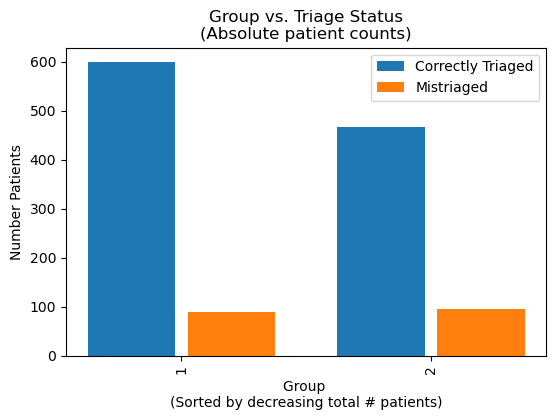

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  Group    0   1  Total  Prop. Mistriaged
0              2  467  95    562          0.169039
1              1  599  89    688          0.129360


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.149200
std                0.028057
min                0.129360
25%                0.139280
50%                0.149200
75%                0.159119
max                0.169039

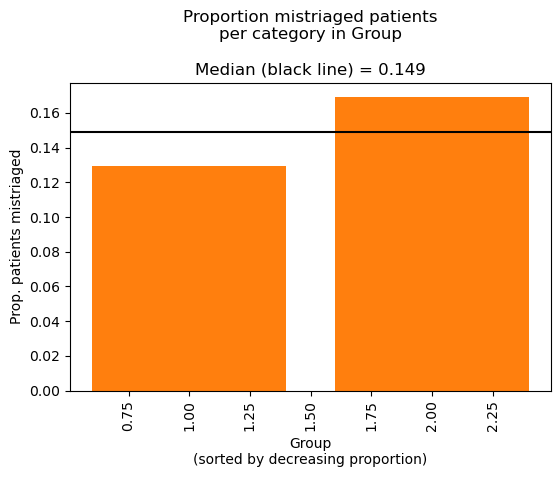




********************************************************************************
Sex
********************************************************************************

===> Top 10 based on total number of patients


mistriage  Sex    0   1  Total
0            2  558  92    650
1            1  508  92    600

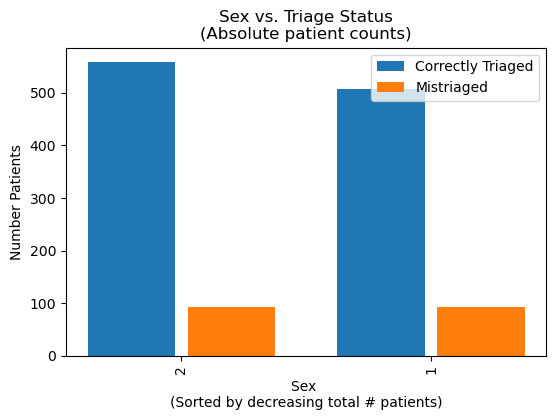

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  Sex    0   1  Total  Prop. Mistriaged
0            1  508  92    600          0.153333
1            2  558  92    650          0.141538


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.147436
std                0.008340
min                0.141538
25%                0.144487
50%                0.147436
75%                0.150385
max                0.153333

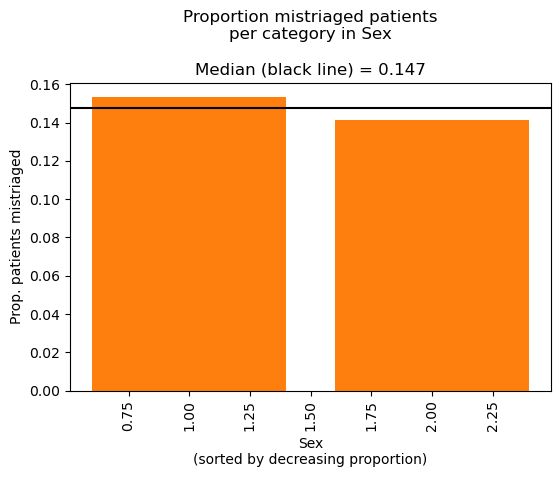




********************************************************************************
Arrival mode
********************************************************************************

===> Top 10 based on total number of patients


mistriage  Arrival mode    0   1  Total
0                     3  642  98    740
1                     2  227  37    264
2                     4  121  32    153
3                     1   65  14     79
4                     6    8   2     10
5                     5    1   1      2
6                     7    2   0      2

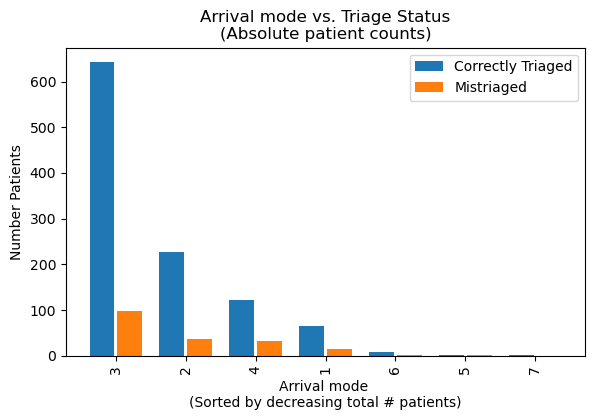

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  Arrival mode    0   1  Total  Prop. Mistriaged
0                     5    1   1      2          0.500000
1                     4  121  32    153          0.209150
2                     6    8   2     10          0.200000
3                     1   65  14     79          0.177215
4                     2  227  37    264          0.140152
5                     3  642  98    740          0.132432
6                     7    2   0      2          0.000000


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              7.000000
mean               0.194136
std                0.151937
min                0.000000
25%                0.136292
50%                0.177215
75%                0.204575
max                0.500000

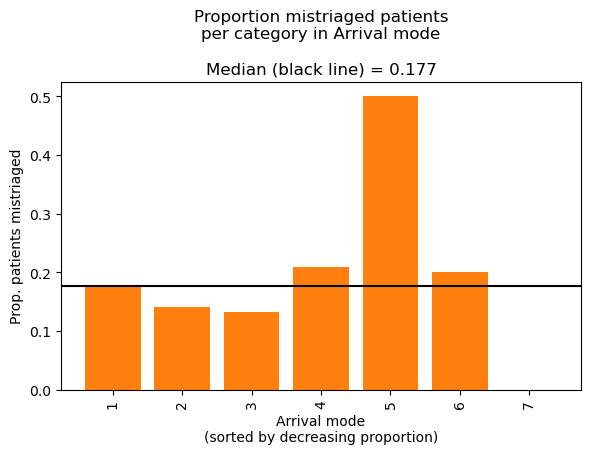




********************************************************************************
Injury
********************************************************************************

===> Top 10 based on total number of patients


mistriage  Injury    0    1  Total
0               1  850  158   1008
1               2  216   26    242

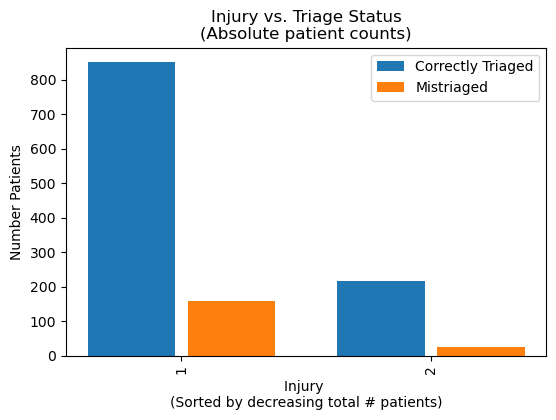

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  Injury    0    1  Total  Prop. Mistriaged
0               1  850  158   1008          0.156746
1               2  216   26    242          0.107438


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.132092
std                0.034866
min                0.107438
25%                0.119765
50%                0.132092
75%                0.144419
max                0.156746

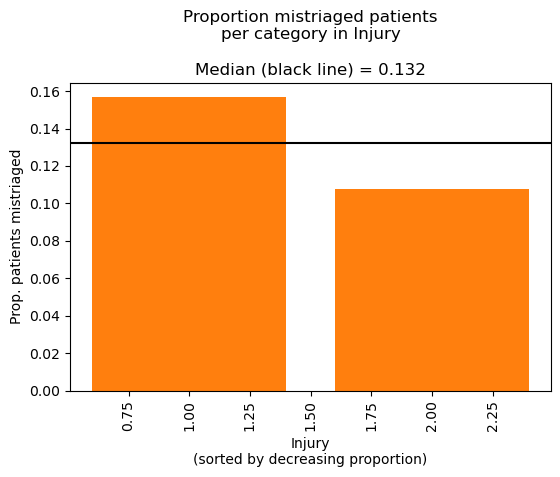




********************************************************************************
Chief_complain
********************************************************************************

===> Top 10 based on total number of patients


mistriage    Chief_complain   0   1  Total
0            abdominal pain  78   5     83
1                 dizziness  56   3     59
2                   dyspnea  45  11     56
3                     fever  33  12     45
4            ant chest pain  43   1     44
5                  headache  33   9     42
6                open wound  29   2     31
7          general weakness  17   5     22
8           epigastric pain  17   5     22
9             mental change  18   4     22

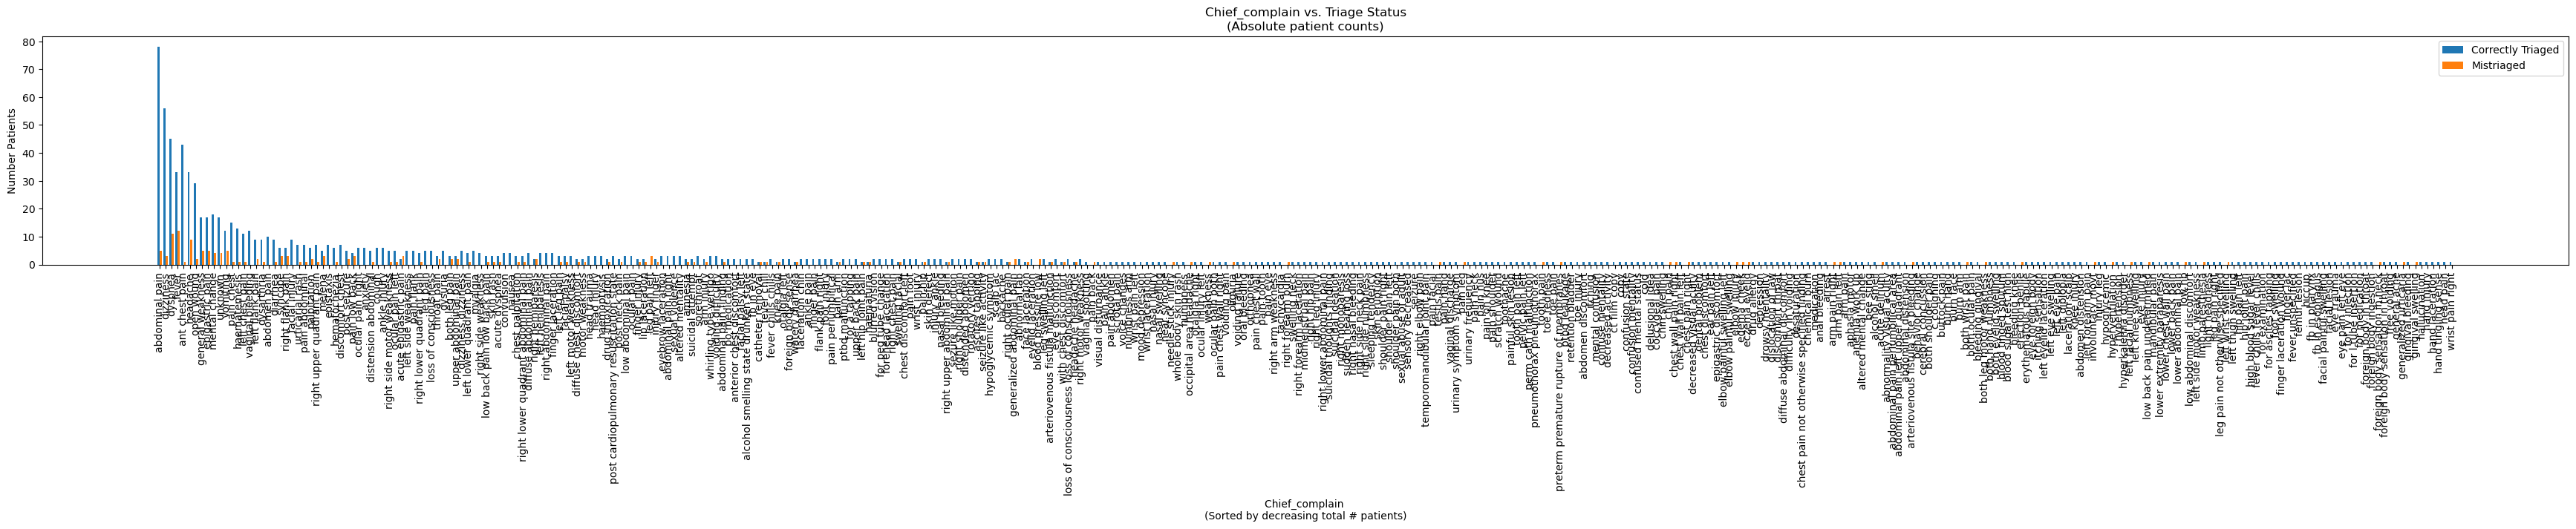

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage                          Chief_complain  0  1  Total  \
0          preterm premature rupture of membranes  0  1      1   
1             arteriovenous fistula site bleeding  0  1      1   
2                                       pain back  0  1      1   
3                         both leg motor weakness  0  1      1   
4                              blood pressure low  0  2      2   
5                      generalized abdominal pain  0  2      2   
6                                 erection penile  0  1      1   
7                               gingival swelling  0  1      1   
8                           generalized urticaria  0  1      1   
9                                involuntary movt  0  1      1   

mistriage  Prop. Mistriaged  
0                       1.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       1.0  
5                       1.0  
6                       1.0  
7                       1.0  
8                       1.0  
9                       1.0


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count            379.000000
mean               0.153658
std                0.306315
min                0.000000
25%                0.000000
50%                0.000000
75%                0.166667
max                1.000000

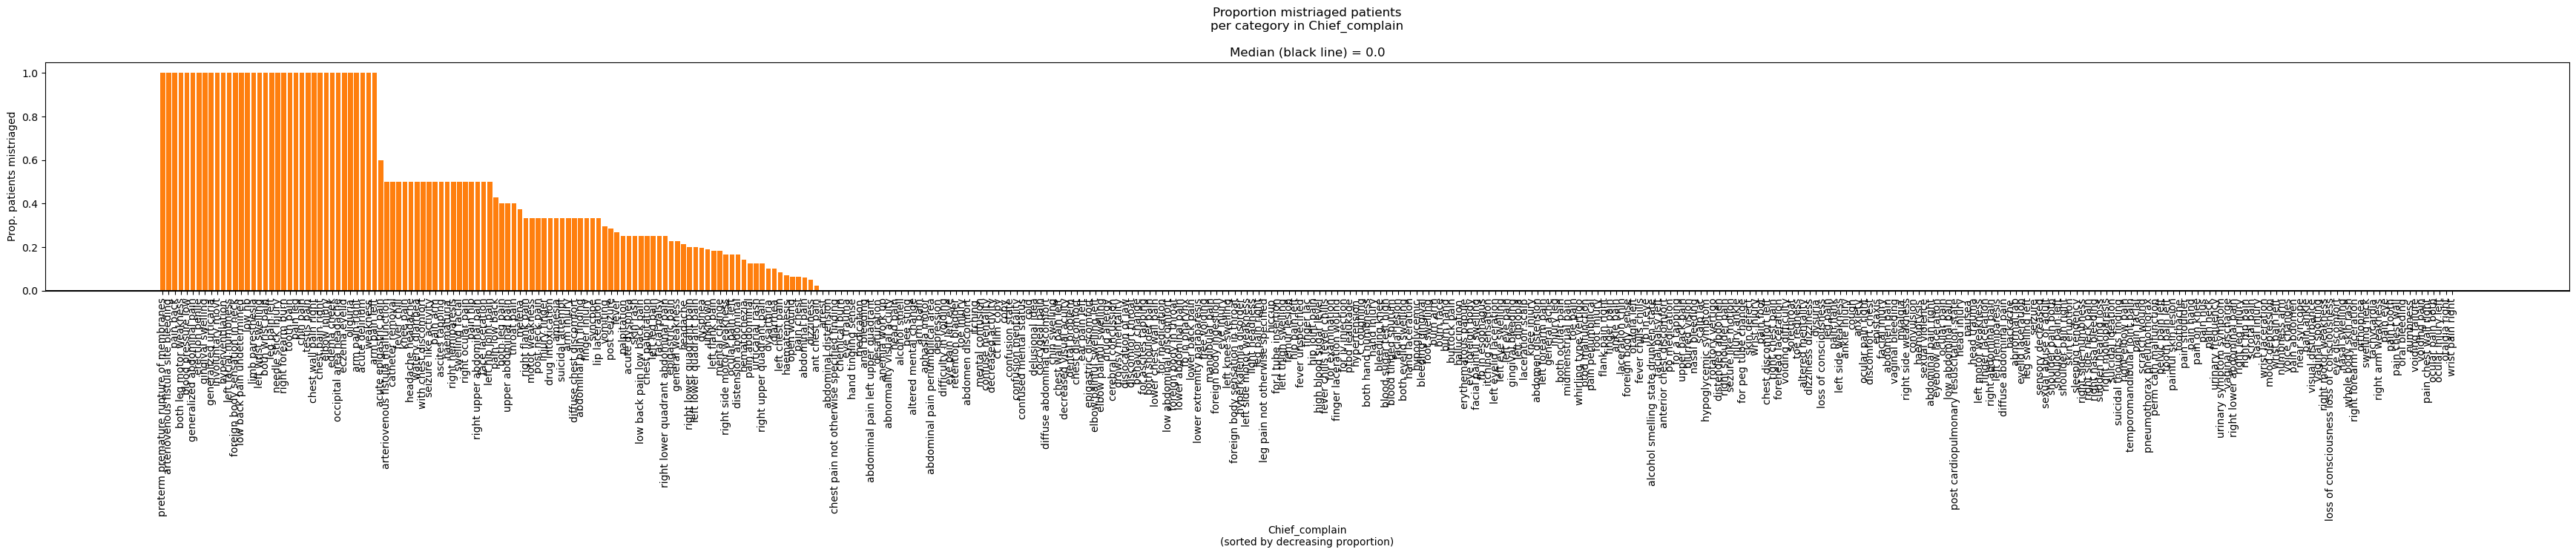




********************************************************************************
Mental
********************************************************************************

===> Top 10 based on total number of patients


mistriage  Mental     0    1  Total
0               1  1004  166   1170
1               2    31    8     39
2               3    19    9     28
3               4    12    1     13

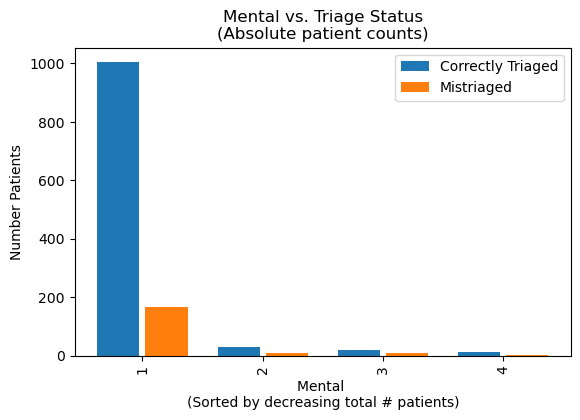

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  Mental     0    1  Total  Prop. Mistriaged
0               3    19    9     28          0.321429
1               2    31    8     39          0.205128
2               1  1004  166   1170          0.141880
3               4    12    1     13          0.076923


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              4.000000
mean               0.186340
std                0.104164
min                0.076923
25%                0.125641
50%                0.173504
75%                0.234203
max                0.321429

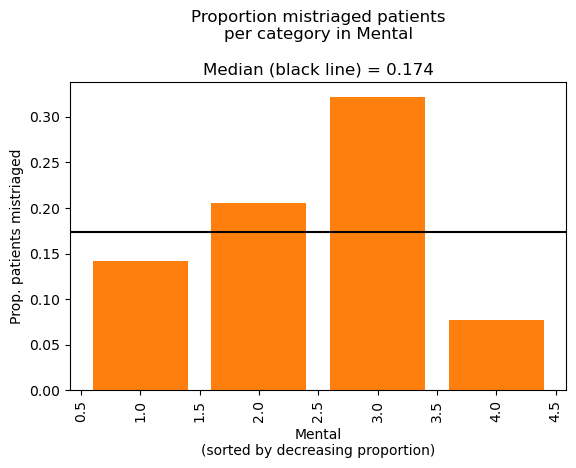




********************************************************************************
Pain
********************************************************************************

===> Top 10 based on total number of patients


mistriage  Pain    0    1  Total
0             1  602  105    707
1             0  464   79    543

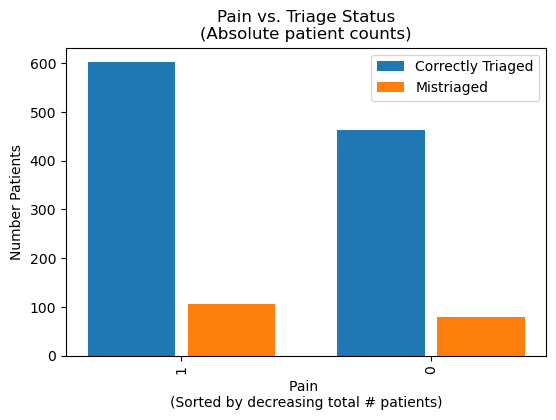

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  Pain    0    1  Total  Prop. Mistriaged
0             1  602  105    707          0.148515
1             0  464   79    543          0.145488


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.147001
std                0.002140
min                0.145488
25%                0.146245
50%                0.147001
75%                0.147758
max                0.148515

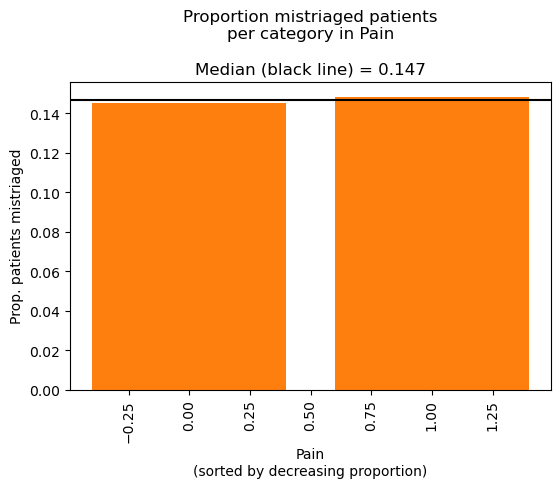




********************************************************************************
NRS_pain
********************************************************************************

===> Top 10 based on total number of patients


mistriage  NRS_pain    0   1  Total
0                 0  464  79    543
1                 3  251  25    276
2                 4  110  27    137
3                 5  113  22    135
4                 6   58  12     70
5                 2   34   7     41
6                 7   29   4     33
7                 8    4   5      9
8                10    2   1      3
9                 1    1   1      2

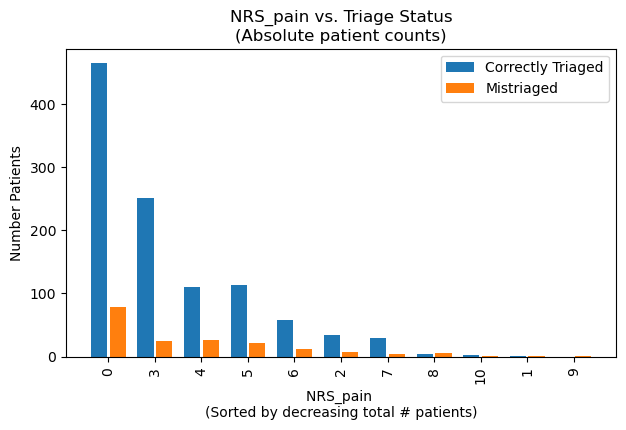

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  NRS_pain    0   1  Total  Prop. Mistriaged
0                 9    0   1      1          1.000000
1                 8    4   5      9          0.555556
2                 1    1   1      2          0.500000
3                10    2   1      3          0.333333
4                 4  110  27    137          0.197080
5                 6   58  12     70          0.171429
6                 2   34   7     41          0.170732
7                 5  113  22    135          0.162963
8                 0  464  79    543          0.145488
9                 7   29   4     33          0.121212


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count             11.000000
mean               0.313488
std                0.275087
min                0.090580
25%                0.154225
50%                0.171429
75%                0.416667
max                1.000000

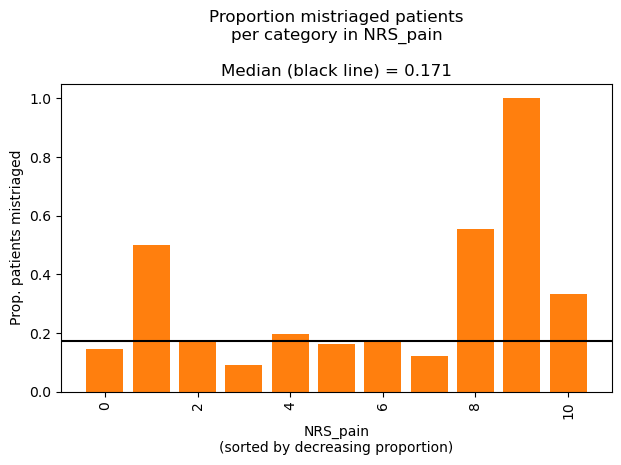




********************************************************************************
KTAS_RN
********************************************************************************

===> Top 10 based on total number of patients


mistriage  KTAS_RN    0   1  Total
0                4  416  81    497
1                3  391  46    437
2                2  181  31    212
3                5   63  23     86
4                1   15   3     18

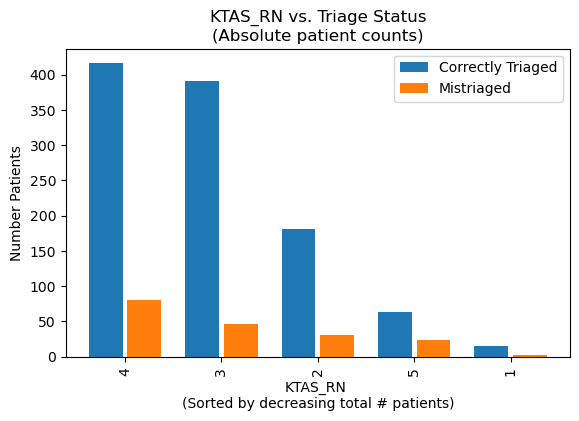

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  KTAS_RN    0   1  Total  Prop. Mistriaged
0                5   63  23     86          0.267442
1                1   15   3     18          0.166667
2                4  416  81    497          0.162978
3                2  181  31    212          0.146226
4                3  391  46    437          0.105263


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              5.000000
mean               0.169715
std                0.059814
min                0.105263
25%                0.146226
50%                0.162978
75%                0.166667
max                0.267442

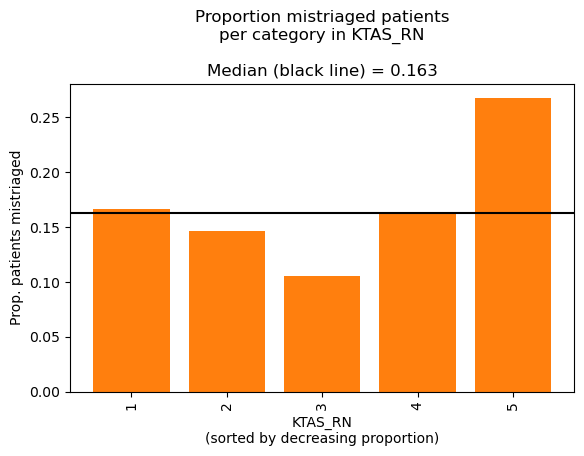




********************************************************************************
Diagnosis in ED
********************************************************************************

===> Top 10 based on total number of patients


mistriage                           Diagnosis in ED   0  1  Total
0                             acute gastroenteritis  45  4     49
1                                          headache  21  5     26
2                        unspecified abdominal pain  17  6     23
3                              ischaemic chest pain  20  1     21
4                                         dizziness  18  2     20
5            open wound of other parts of head face  18  1     19
6                                   unstable angina  15  2     17
7                           dizziness and giddiness  14  1     15
8          gastrointestinal haemorrhage unspecified  11  3     14
9                                      ureter stone  13  0     13

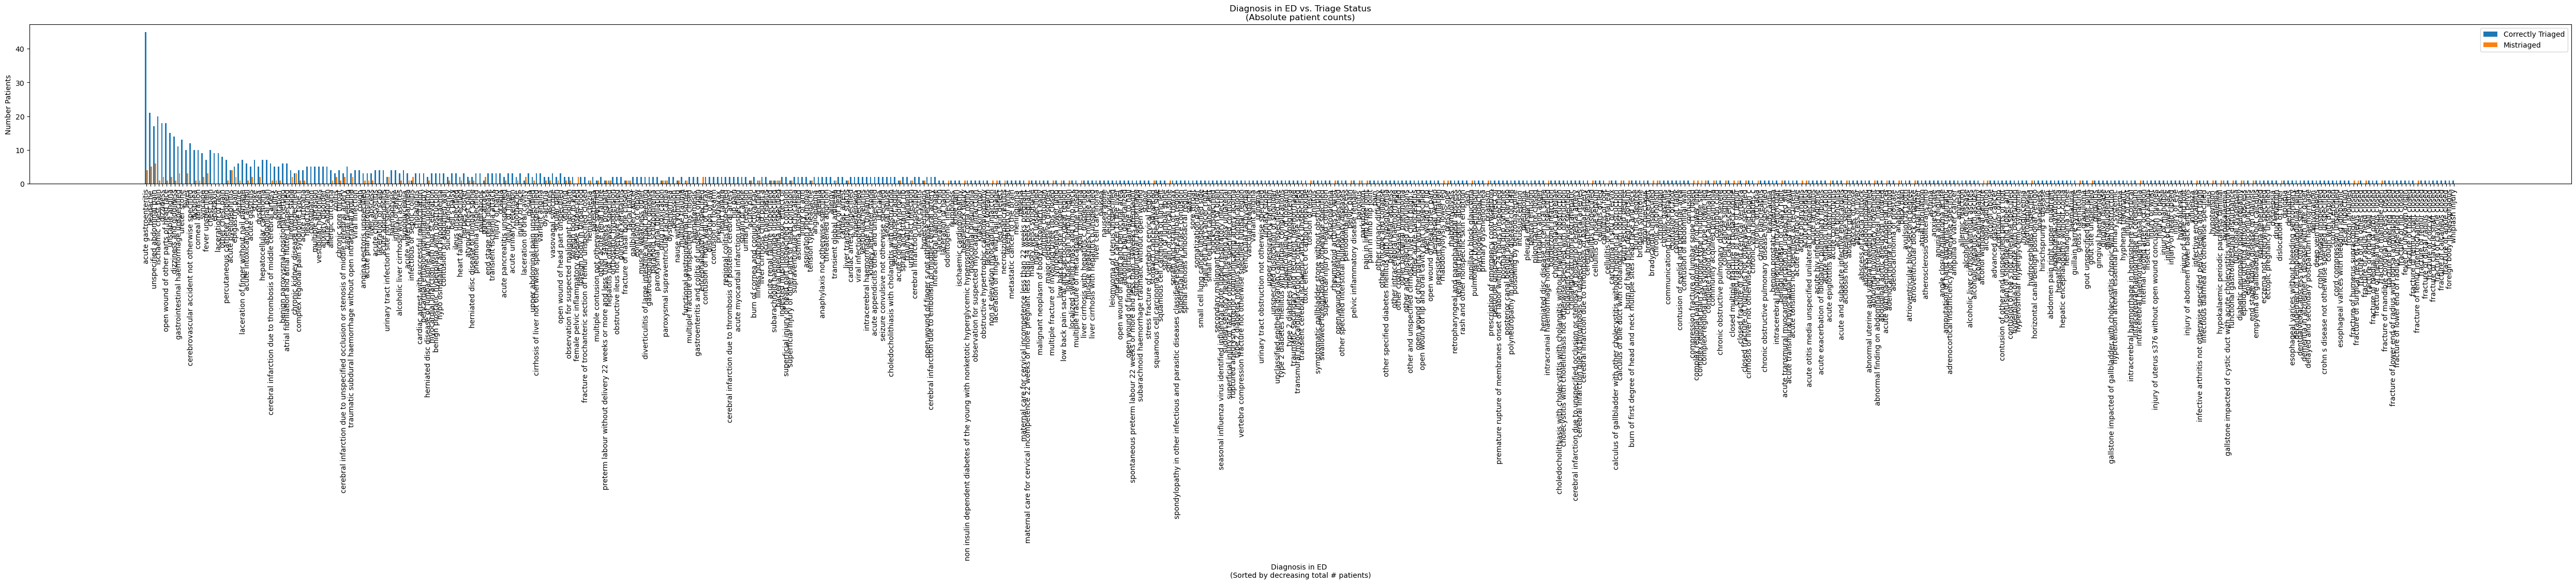

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage                                       Diagnosis in ED  0  1  Total  \
0                                             torsion of testis  0  1      1   
1                            diabetic neuropathy polyneuropathy  0  1      1   
2                                          colon cancer sigmoid  0  1      1   
3                                  community acquired pneumonia  0  1      1   
4                                    encephalopathy unspecified  0  2      2   
5               complex regional pain syndrome type i lower leg  0  1      1   
6           complex regional pain syndrome type i multiple site  0  1      1   
7          complex regional pain syndrome type ii of lower limb  0  1      1   
8                compression fracture of lumbar spine l1 closed  0  1      1   
9                                        infective endocarditis  0  1      1   

mistriage  Prop. Mistriaged  
0                       1.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       1.0  
5                       1.0  
6                       1.0  
7                       1.0  
8                       1.0  
9                       1.0


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count            574.000000
mean               0.162350
std                0.330855
min                0.000000
25%                0.000000
50%                0.000000
75%                0.035714
max                1.000000

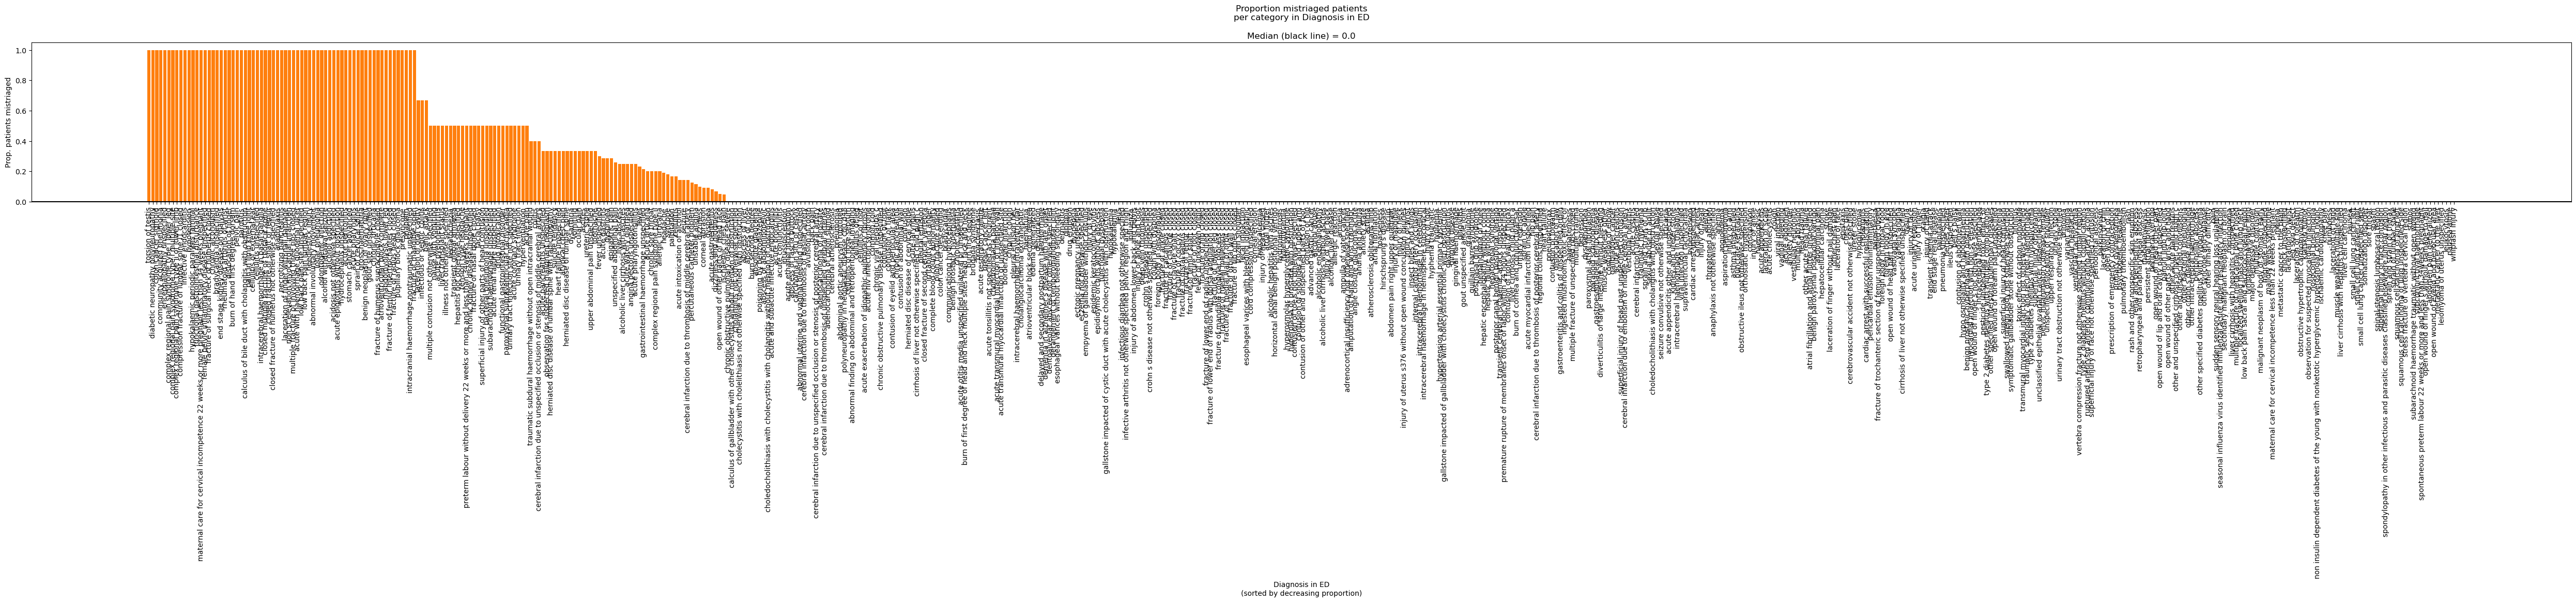




********************************************************************************
Disposition
********************************************************************************

===> Top 10 based on total number of patients


mistriage  Disposition    0    1  Total
0                    1  678  112    790
1                    2  311   52    363
2                    5   23    9     32
3                    4   23    3     26
4                    7   19    3     22
5                    6    8    1      9
6                    3    4    4      8

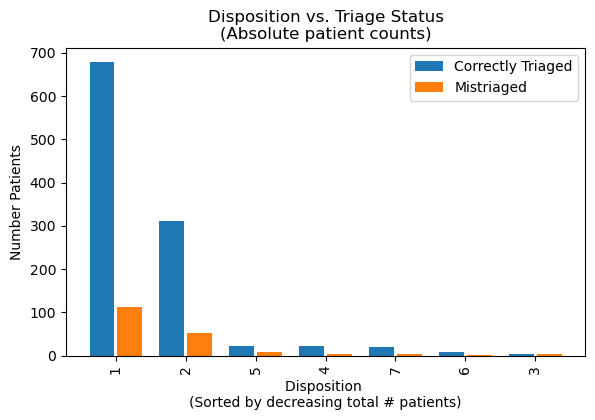

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  Disposition    0    1  Total  Prop. Mistriaged
0                    3    4    4      8          0.500000
1                    5   23    9     32          0.281250
2                    2  311   52    363          0.143251
3                    1  678  112    790          0.141772
4                    7   19    3     22          0.136364
5                    4   23    3     26          0.115385
6                    6    8    1      9          0.111111


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              7.000000
mean               0.204162
std                0.142713
min                0.111111
25%                0.125874
50%                0.141772
75%                0.212250
max                0.500000

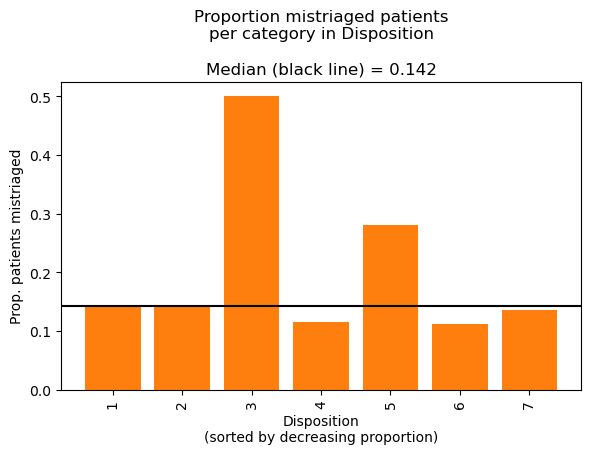




********************************************************************************
KTAS_expert
********************************************************************************

===> Top 10 based on total number of patients


mistriage  KTAS_expert    0   1  Total
0                    3  391  86    477
1                    4  416  39    455
2                    2  181  36    217
3                    5   63  12     75
4                    1   15  11     26

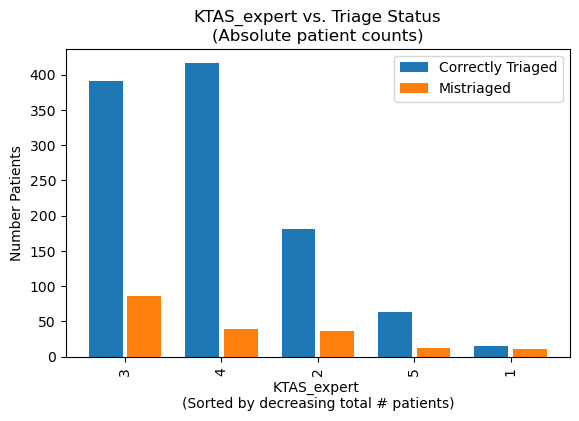

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  KTAS_expert    0   1  Total  Prop. Mistriaged
0                    1   15  11     26          0.423077
1                    3  391  86    477          0.180294
2                    2  181  36    217          0.165899
3                    5   63  12     75          0.160000
4                    4  416  39    455          0.085714


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              5.000000
mean               0.202997
std                0.128385
min                0.085714
25%                0.160000
50%                0.165899
75%                0.180294
max                0.423077

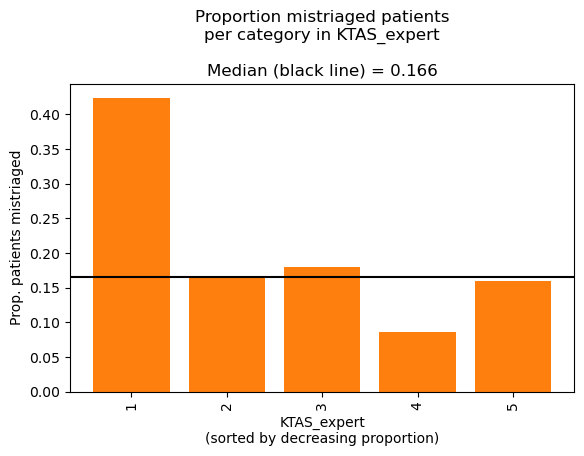




********************************************************************************
Error_group
********************************************************************************

===> Top 10 based on total number of patients


mistriage  Error_group     0   1  Total
0                    0  1066   0   1066
1                    4     0  63     63
2                    2     0  47     47
3                    1     0  21     21
4                    5     0  13     13
5                    6     0   9      9
6                    7     0   9      9
7                    8     0   9      9
8                    9     0   7      7
9                    3     0   6      6

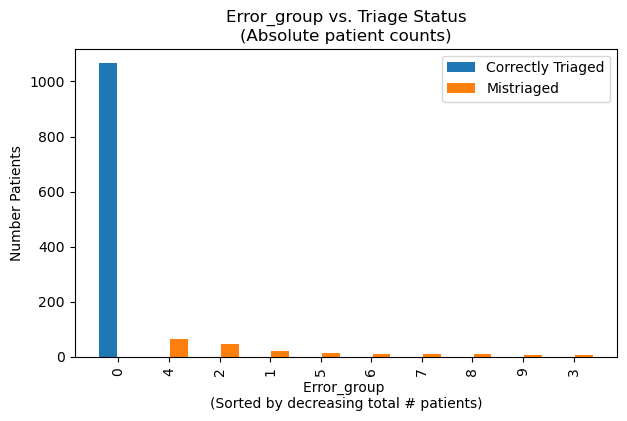

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  Error_group     0   1  Total  Prop. Mistriaged
0                    4     0  63     63               1.0
1                    2     0  47     47               1.0
2                    1     0  21     21               1.0
3                    5     0  13     13               1.0
4                    6     0   9      9               1.0
5                    7     0   9      9               1.0
6                    8     0   9      9               1.0
7                    9     0   7      7               1.0
8                    3     0   6      6               1.0
9                    0  1066   0   1066               0.0


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count             10.000000
mean               0.900000
std                0.316228
min                0.000000
25%                1.000000
50%                1.000000
75%                1.000000
max                1.000000

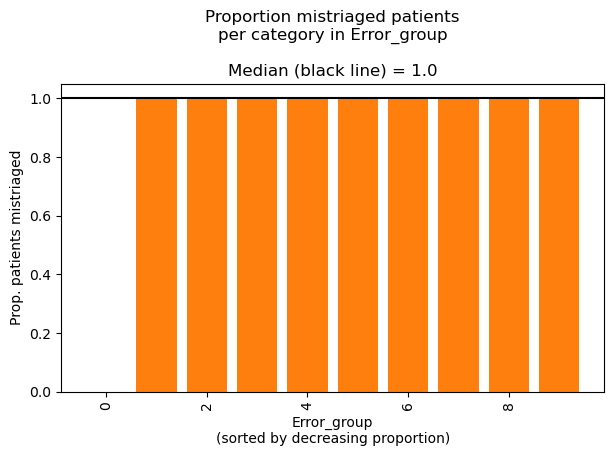




********************************************************************************
CC_pain_trauma
********************************************************************************

===> Top 10 based on total number of patients


mistriage  CC_pain_trauma    0    1  Total
0                       0  579  106    685
1                       1  487   78    565

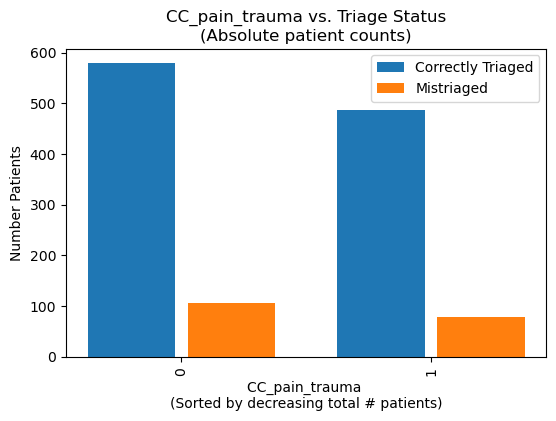

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  CC_pain_trauma    0    1  Total  Prop. Mistriaged
0                       0  579  106    685          0.154745
1                       1  487   78    565          0.138053


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.146399
std                0.011803
min                0.138053
25%                0.142226
50%                0.146399
75%                0.150572
max                0.154745

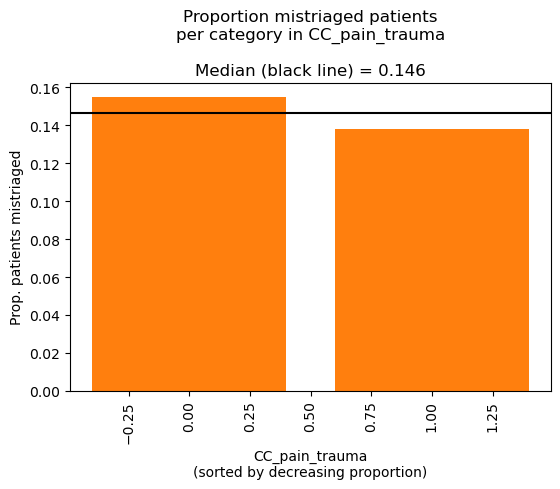




********************************************************************************
CC_respiratory
********************************************************************************

===> Top 10 based on total number of patients


mistriage  CC_respiratory    0    1  Total
0                       0  998  170   1168
1                       1   68   14     82

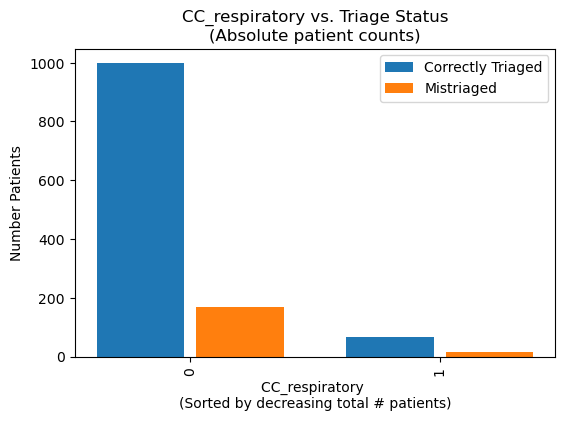

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  CC_respiratory    0    1  Total  Prop. Mistriaged
0                       1   68   14     82          0.170732
1                       0  998  170   1168          0.145548


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.158140
std                0.017808
min                0.145548
25%                0.151844
50%                0.158140
75%                0.164436
max                0.170732

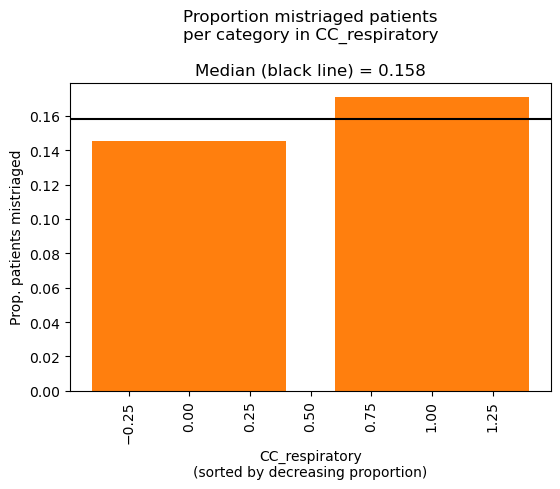




********************************************************************************
CC_cardiovascular
********************************************************************************

===> Top 10 based on total number of patients


mistriage  CC_cardiovascular    0    1  Total
0                          0  957  170   1127
1                          1  109   14    123

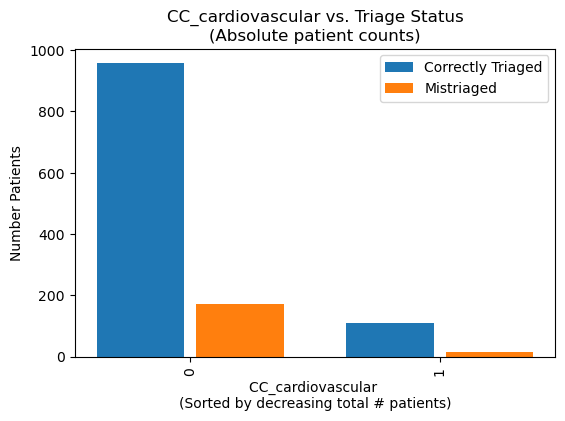

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  CC_cardiovascular    0    1  Total  Prop. Mistriaged
0                          0  957  170   1127          0.150843
1                          1  109   14    123          0.113821


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.132332
std                0.026178
min                0.113821
25%                0.123077
50%                0.132332
75%                0.141587
max                0.150843

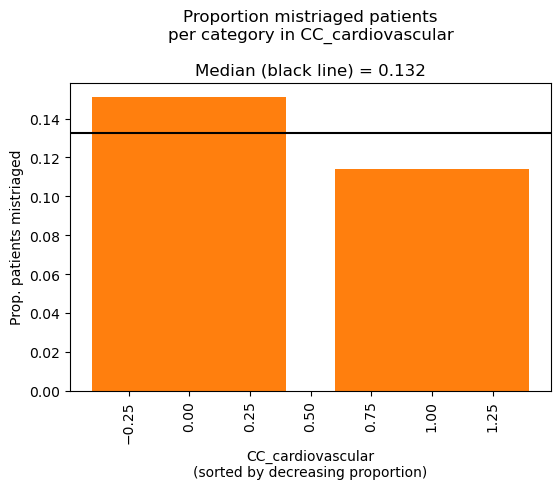




********************************************************************************
CC_neurological
********************************************************************************

===> Top 10 based on total number of patients


mistriage  CC_neurological    0    1  Total
0                        0  890  152   1042
1                        1  176   32    208

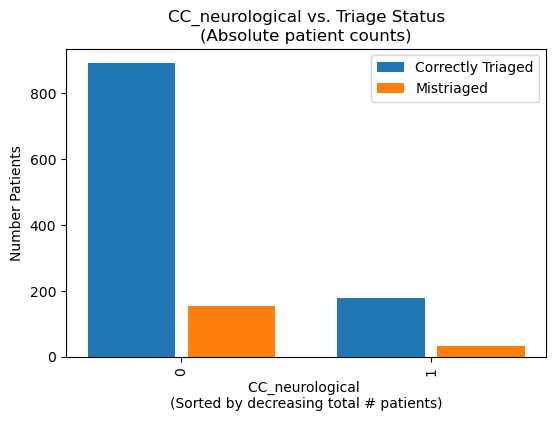

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  CC_neurological    0    1  Total  Prop. Mistriaged
0                        1  176   32    208          0.153846
1                        0  890  152   1042          0.145873


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.149860
std                0.005638
min                0.145873
25%                0.147867
50%                0.149860
75%                0.151853
max                0.153846

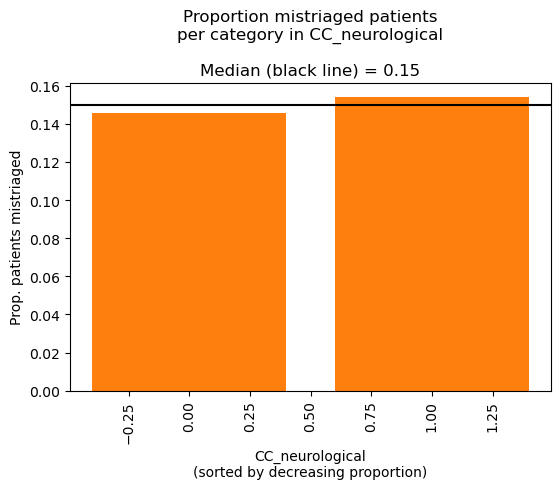




********************************************************************************
CC_gastrointestinal
********************************************************************************

===> Top 10 based on total number of patients


mistriage  CC_gastrointestinal    0    1  Total
0                            0  868  150   1018
1                            1  198   34    232

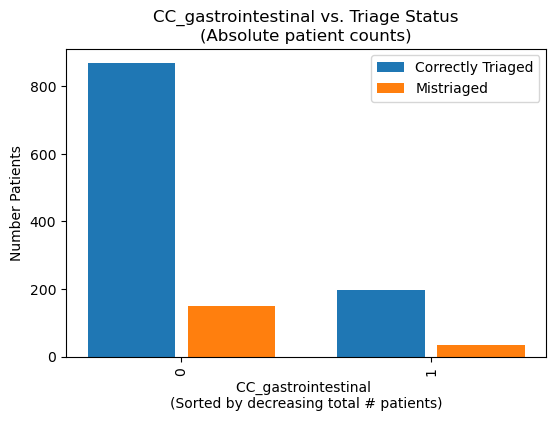

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  CC_gastrointestinal    0    1  Total  Prop. Mistriaged
0                            0  868  150   1018          0.147348
1                            1  198   34    232          0.146552


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.146950
std                0.000563
min                0.146552
25%                0.146751
50%                0.146950
75%                0.147149
max                0.147348

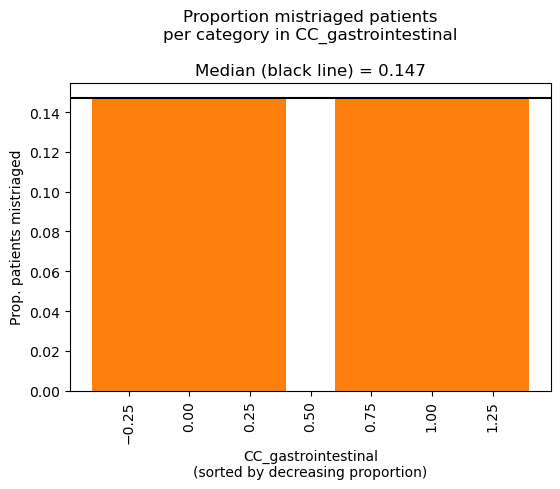




********************************************************************************
CC_systemic_infectious
********************************************************************************

===> Top 10 based on total number of patients


mistriage  CC_systemic_infectious    0    1  Total
0                               0  999  163   1162
1                               1   67   21     88

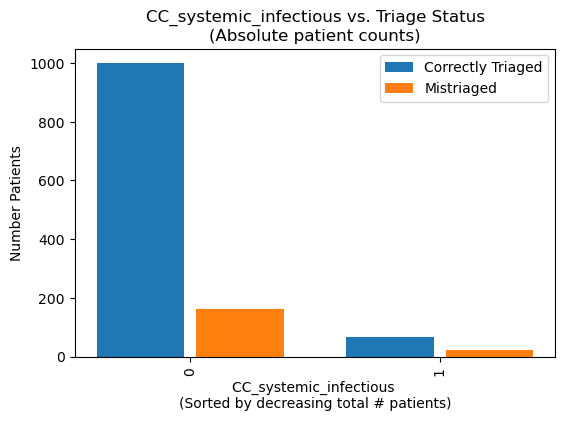

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  CC_systemic_infectious    0    1  Total  Prop. Mistriaged
0                               1   67   21     88          0.238636
1                               0  999  163   1162          0.140275


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.189456
std                0.069552
min                0.140275
25%                0.164866
50%                0.189456
75%                0.214046
max                0.238636

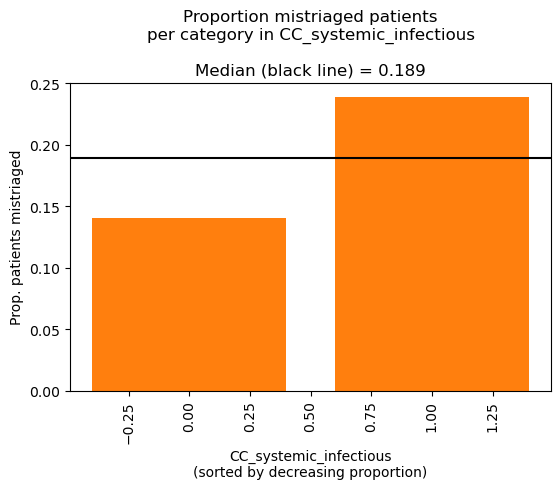




********************************************************************************
CC_other
********************************************************************************

===> Top 10 based on total number of patients


mistriage  CC_other    0    1  Total
0                 0  860  158   1018
1                 1  206   26    232

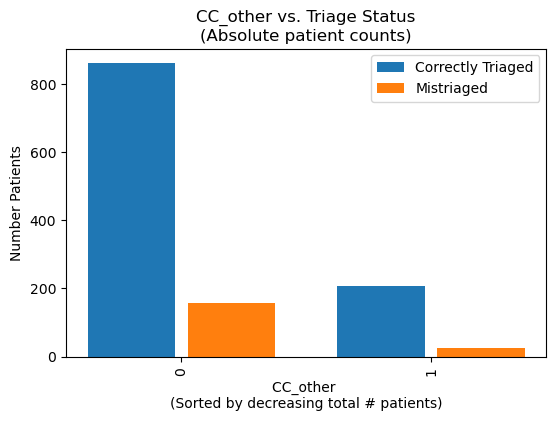

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  CC_other    0    1  Total  Prop. Mistriaged
0                 0  860  158   1018          0.155206
1                 1  206   26    232          0.112069


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.133638
std                0.030503
min                0.112069
25%                0.122853
50%                0.133638
75%                0.144422
max                0.155206

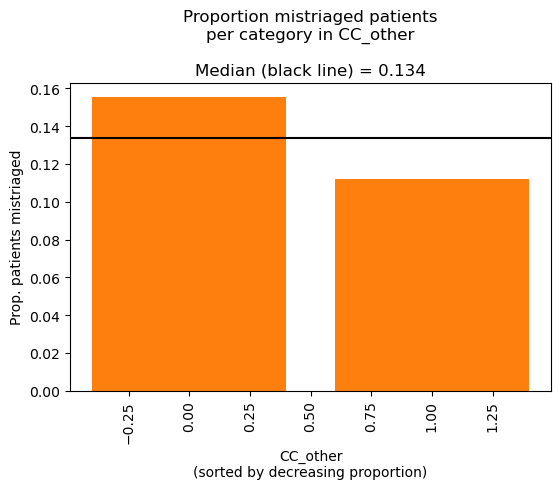




********************************************************************************
DG_cardiovascular
********************************************************************************

===> Top 10 based on total number of patients


mistriage  DG_cardiovascular     0    1  Total
0                          0  1006  178   1184
1                          1    60    6     66

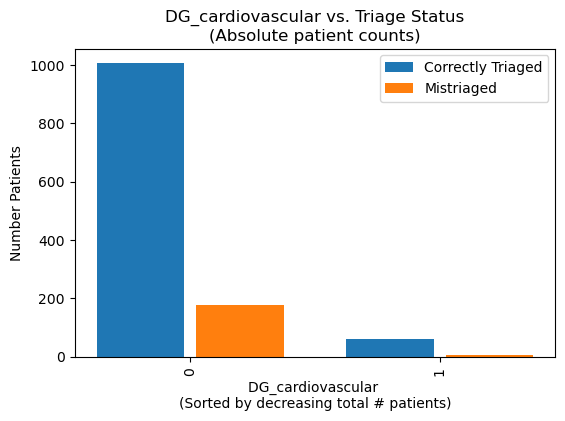

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  DG_cardiovascular     0    1  Total  Prop. Mistriaged
0                          0  1006  178   1184          0.150338
1                          1    60    6     66          0.090909


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.120623
std                0.042022
min                0.090909
25%                0.105766
50%                0.120623
75%                0.135481
max                0.150338

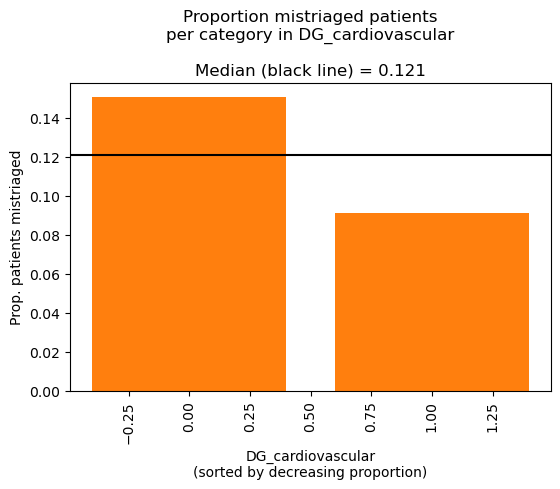




********************************************************************************
DG_respiratory
********************************************************************************

===> Top 10 based on total number of patients


mistriage  DG_respiratory     0    1  Total
0                       0  1035  180   1215
1                       1    31    4     35

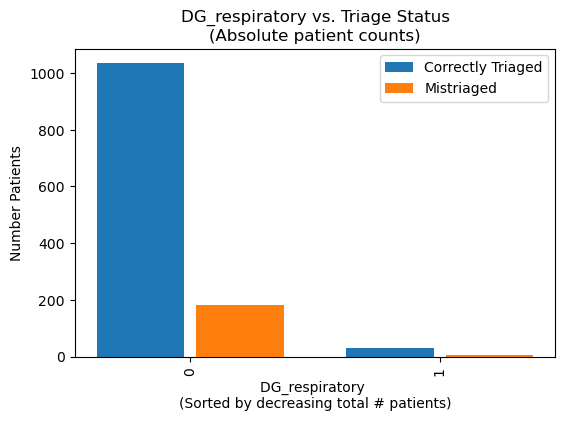

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  DG_respiratory     0    1  Total  Prop. Mistriaged
0                       0  1035  180   1215          0.148148
1                       1    31    4     35          0.114286


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.131217
std                0.023944
min                0.114286
25%                0.122751
50%                0.131217
75%                0.139683
max                0.148148

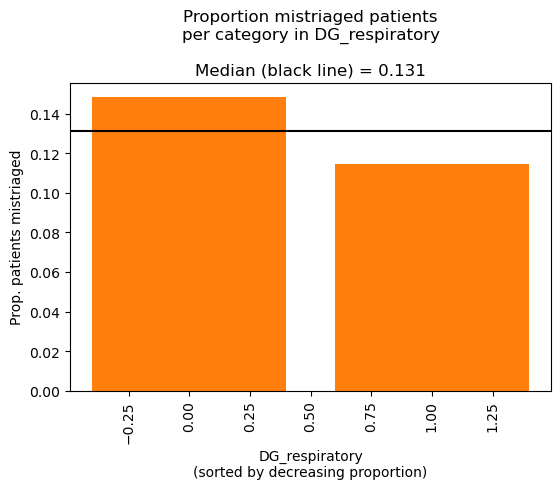




********************************************************************************
DG_neurological
********************************************************************************

===> Top 10 based on total number of patients


mistriage  DG_neurological    0    1  Total
0                        0  954  158   1112
1                        1  112   26    138

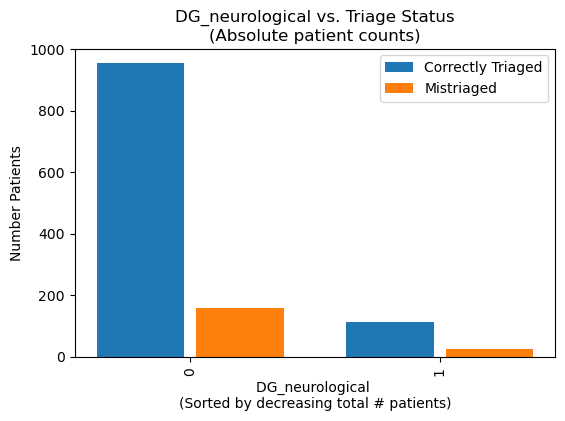

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  DG_neurological    0    1  Total  Prop. Mistriaged
0                        1  112   26    138          0.188406
1                        0  954  158   1112          0.142086


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.165246
std                0.032753
min                0.142086
25%                0.153666
50%                0.165246
75%                0.176826
max                0.188406

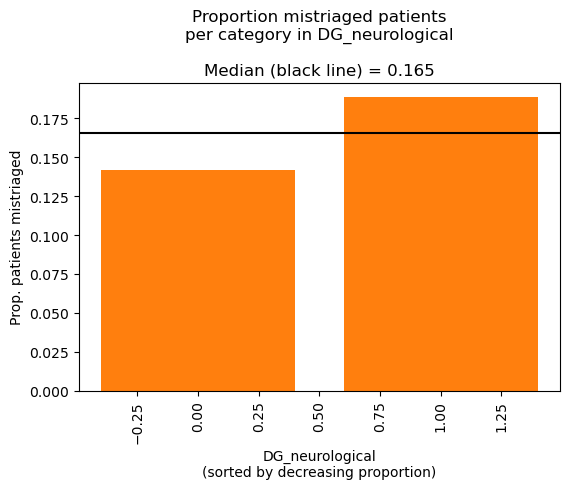




********************************************************************************
DG_gastrointestinal
********************************************************************************

===> Top 10 based on total number of patients


mistriage  DG_gastrointestinal    0    1  Total
0                            0  960  168   1128
1                            1  106   16    122

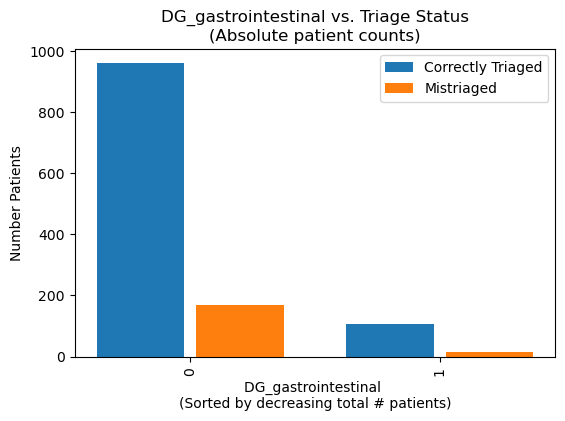

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  DG_gastrointestinal    0    1  Total  Prop. Mistriaged
0                            0  960  168   1128          0.148936
1                            1  106   16    122          0.131148


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.140042
std                0.012578
min                0.131148
25%                0.135595
50%                0.140042
75%                0.144489
max                0.148936

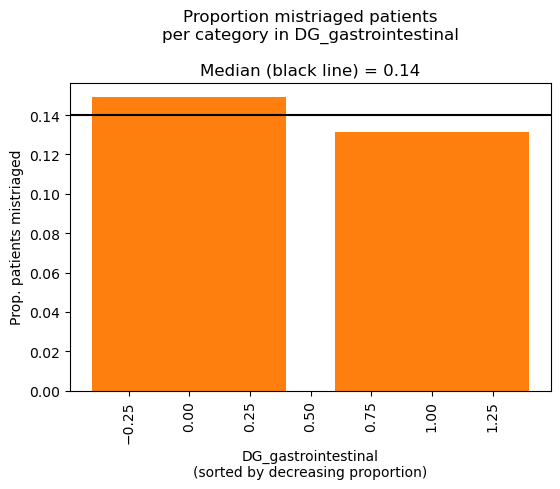




********************************************************************************
DG_musculoskeletal_trauma
********************************************************************************

===> Top 10 based on total number of patients


mistriage  DG_musculoskeletal_trauma    0    1  Total
0                                  0  933  162   1095
1                                  1  133   22    155

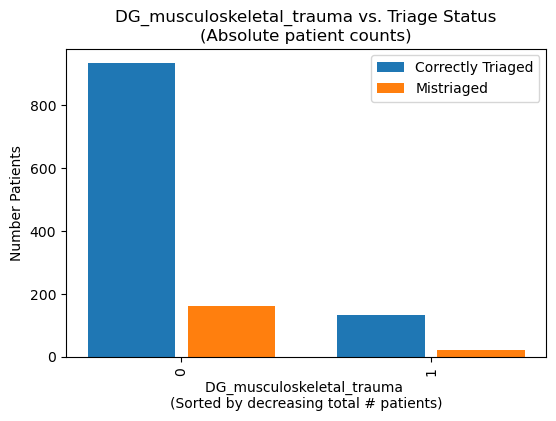

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  DG_musculoskeletal_trauma    0    1  Total  Prop. Mistriaged
0                                  0  933  162   1095          0.147945
1                                  1  133   22    155          0.141935


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.144940
std                0.004250
min                0.141935
25%                0.143438
50%                0.144940
75%                0.146443
max                0.147945

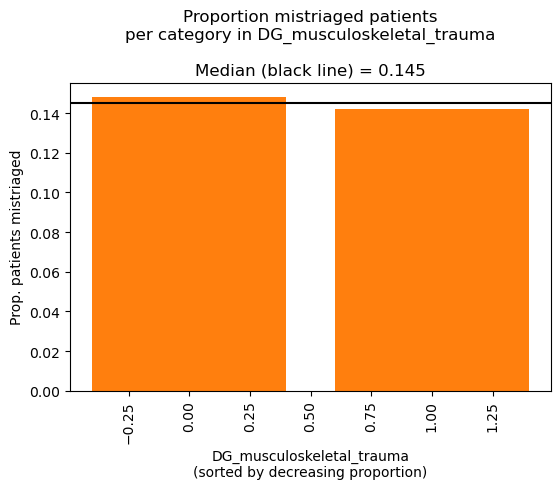




********************************************************************************
DG_infectious
********************************************************************************

===> Top 10 based on total number of patients


mistriage  DG_infectious    0    1  Total
0                      0  981  168   1149
1                      1   85   16    101

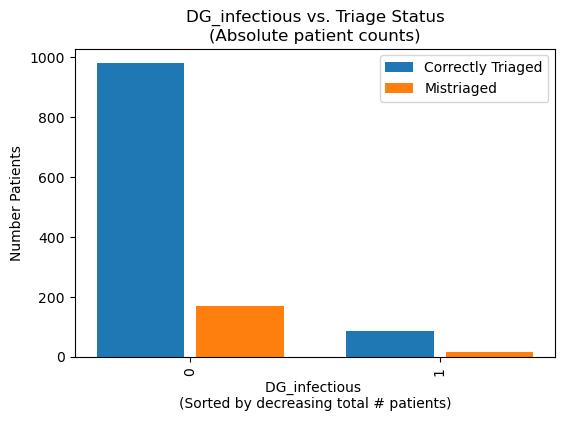

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  DG_infectious    0    1  Total  Prop. Mistriaged
0                      1   85   16    101          0.158416
1                      0  981  168   1149          0.146214


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.152315
std                0.008628
min                0.146214
25%                0.149265
50%                0.152315
75%                0.155365
max                0.158416

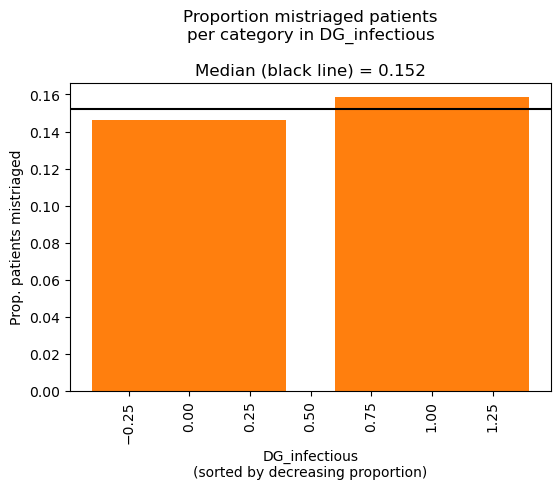




********************************************************************************
DG_genitourinary
********************************************************************************

===> Top 10 based on total number of patients


mistriage  DG_genitourinary     0    1  Total
0                         0  1037  176   1213
1                         1    29    8     37

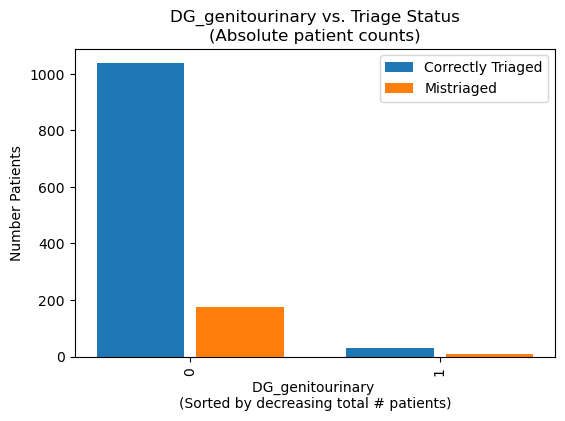

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  DG_genitourinary     0    1  Total  Prop. Mistriaged
0                         1    29    8     37          0.216216
1                         0  1037  176   1213          0.145095


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.180656
std                0.050290
min                0.145095
25%                0.162875
50%                0.180656
75%                0.198436
max                0.216216

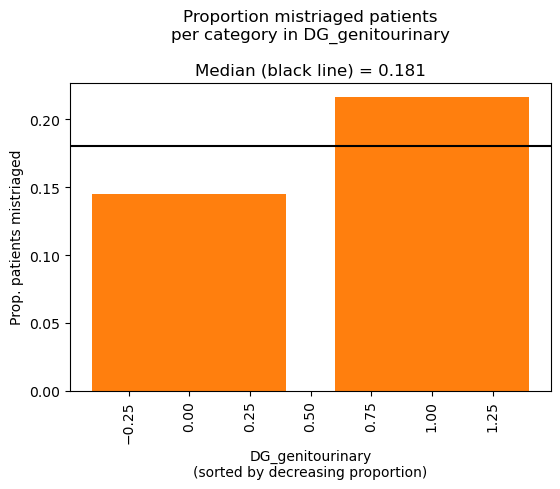




********************************************************************************
DG_other_systemic
********************************************************************************

===> Top 10 based on total number of patients


mistriage  DG_other_systemic    0    1  Total
0                          0  999  169   1168
1                          1   67   15     82

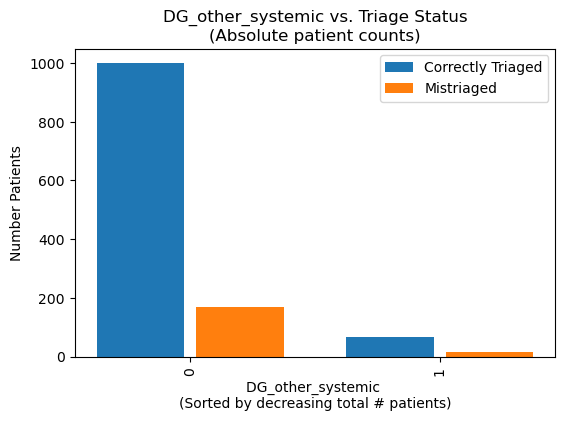

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  DG_other_systemic    0    1  Total  Prop. Mistriaged
0                          1   67   15     82          0.182927
1                          0  999  169   1168          0.144692


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.163809
std                0.027036
min                0.144692
25%                0.154251
50%                0.163809
75%                0.173368
max                0.182927

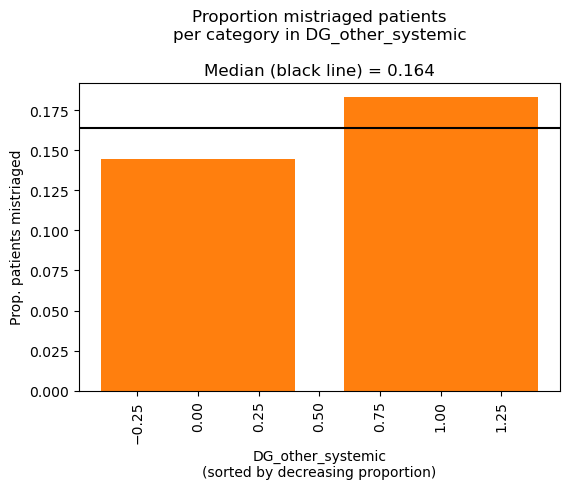




********************************************************************************
DG_other
********************************************************************************

===> Top 10 based on total number of patients


mistriage  DG_other    0   1  Total
0                 0  542  97    639
1                 1  524  87    611

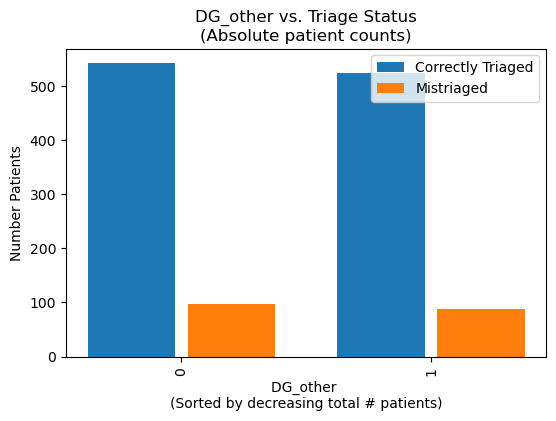

------------------------------------------------------------------------------------------

===> Top 10 based on proportion mistriaged patients


mistriage  DG_other    0   1  Total  Prop. Mistriaged
0                 0  542  97    639           0.15180
1                 1  524  87    611           0.14239


===> Summary statstics of proportion mistriaged patients


mistriage  Prop. Mistriaged
count              2.000000
mean               0.147095
std                0.006654
min                0.142390
25%                0.144742
50%                0.147095
75%                0.149447
max                0.151800

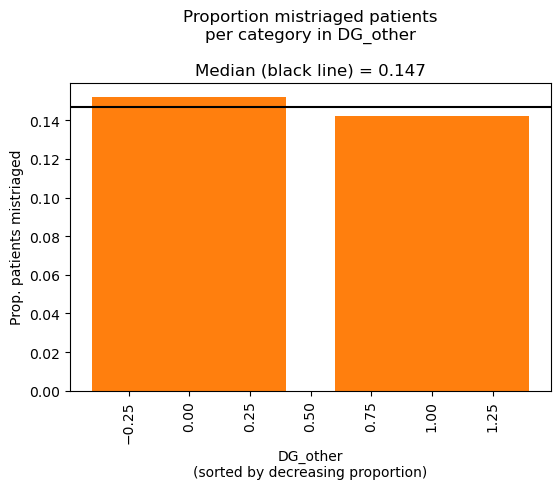

In [53]:
# Plot for each category
for cat in categories:
    print("\n\n\n" + "*" * 80)
    print(cat)
    print("*" * 80)
    
    # obtain absolute counts of mistriaged (1=True) and not mistriaged (0=False) patients across categories within variable
    # sort by high to low total patients within categories
    counts = pd.crosstab(df[cat], df['mistriage']).reset_index()
    counts['Total'] = counts[True] + counts[False]
    counts = counts.sort_values('Total', ascending = False)
    print("\n===> Top 10 based on total number of patients")
    display(counts.head(10).reset_index(drop = True))
    
    # plot absolute counts as a grouped barplot
    width_of_bar = 0.35
    x = np.arange(counts.shape[0])
    plt.figure(figsize = (6 + (0.1 * counts.shape[0]), 4))
    plt.bar(x-0.2, counts[False], width_of_bar)
    plt.bar(x+0.2, counts[True], width_of_bar)
    plt.xticks(x, counts[cat])
    plt.ylabel("Number Patients")
    plt.legend(["Correctly Triaged", "Mistriaged"])
    plt.title(cat + " vs. Triage Status\n(Absolute patient counts)")
    plt.xlabel(cat + " \n(Sorted by decreasing total # patients)")
    plt.xticks(rotation = 90)
    plt.show()
    print("-" * 90)
    
    # calculate proportion of mistriaged patients within categories of variable
    # sort by decreasing proportion
    counts["Prop. Mistriaged"] = counts[True] / counts["Total"]
    counts = counts.sort_values("Prop. Mistriaged", ascending = False)
    med = counts["Prop. Mistriaged"].median()
    print("\n===> Top 10 based on proportion mistriaged patients")
    display(counts.head(10).reset_index(drop = True))
    print("\n===> Summary statstics of proportion mistriaged patients")
    display(counts[["Prop. Mistriaged"]].describe())
    
    # plot proportion pateints mistriaged
    plt.figure(figsize = (6 + (0.1 * counts.shape[0]), 4))
    plt.bar(x = counts[cat], height = counts["Prop. Mistriaged"], color ="#ff7f0e")
    plt.ylabel("Prop. patients mistriaged")
    plt.title("Proportion mistriaged patients\nper category in " + cat + "\n\nMedian (black line) = " + str(round(med,3)))
    plt.axhline(med, c = "black")
    plt.xlabel(cat + "\n(sorted by decreasing proportion)")
    plt.xticks(rotation = 90)
    plt.show()

## 6) Explore relationship between mistriage status and continuous variables

In this section, I explore the relationship between continous variables (ie. Age) and whether or not a patient is mistriaged. I will use two types of visualzations. (1) Histograms to visualize the distribution of values for mistriaged and correctly triaged patients, and (2) Boxplots to visualize the distribution and summary statistics between mistriaged and correctly triaged.

In [54]:
# Define continuous variables (columns) of interest
continuous = ['Age',
              'Patients number per hour',
              'SBP',
              'DBP',
              'HR',
              'RR',
              'BT',
              'Saturation',
              'Length of stay_min',
              'KTAS duration_min']

In [55]:
# Display summary statistics
print("====> Summary statistics across continuous values of interest, split by mistriaged (1) or correctly triaged (0)....\n")
display(df[['mistriage'] + continuous].groupby('mistriage').describe().T)

====> Summary statistics across continuous values of interest, split by mistriaged (1) or correctly triaged (0)....



mistriage                                  0             1
Age                      count   1066.000000    184.000000
                         mean      54.303002     55.380435
                         std       19.620750     20.038402
                         min       16.000000     16.000000
                         25%       37.000000     37.000000
                         50%       56.500000     58.000000
                         75%       71.000000     73.250000
                         max       96.000000     90.000000
Patients number per hour count   1066.000000    184.000000
                         mean       7.531895      7.320652
                         std        3.151781      3.257678
                         min        1.000000      1.000000
                         25%        5.000000      5.000000
                         50%        7.000000      7.000000
                         75%       10.000000     10.000000
                         max       17.000000     17.000000
SBP                      count   1047.000000    178.000000
                         mean     134.410697    130.022472
                         std       27.045027     28.724673
                         min       60.000000     50.000000
                         25%      115.000000    110.000000
                         50%      130.000000    130.000000
                         75%      150.000000    143.000000
                         max      275.000000    214.000000
DBP                      count   1044.000000    177.000000
                         mean      79.977969     78.762712
                         std       14.957866     16.550548
                         min       31.000000     33.000000
                         25%       70.000000     70.000000
                         50%       80.000000     80.000000
                         75%       90.000000     90.000000
                         max      154.000000    160.000000
HR                       count   1051.000000    179.000000
                         mean      83.626070     86.206704
                         std       16.345614     18.301064
                         min       35.000000     32.000000
                         25%       72.000000     75.500000
                         50%       80.000000     85.000000
                         75%       96.000000     98.000000
                         max      148.000000    145.000000
RR                       count   1049.000000    179.000000
                         mean      19.450906     19.754190
                         std        2.030709      1.950489
                         min       14.000000     16.000000
                         25%       18.000000     20.000000
                         50%       20.000000     20.000000
                         75%       20.000000     20.000000
                         max       30.000000     30.000000
BT                       count   1054.000000    178.000000
                         mean      36.569355     36.667978
                         std        0.525603      0.659342
                         min       35.000000     36.000000
                         25%       36.200000     36.200000
                         50%       36.500000     36.500000
                         75%       36.800000     36.800000
                         max       41.000000     39.800000
Saturation               count    460.000000     93.000000
                         mean      97.015217     97.086022
                         std        4.465528      4.026153
                         min       20.000000     68.000000
                         25%       97.000000     97.000000
                         50%       98.000000     98.000000
                         75%       98.000000     98.000000
                         max      100.000000    100.000000
Length of stay_min       count   1066.000000    184.000000
                         mean    1597.429644   1936.907609
                         std     3553.608965   




********************************************************************************
Age
********************************************************************************


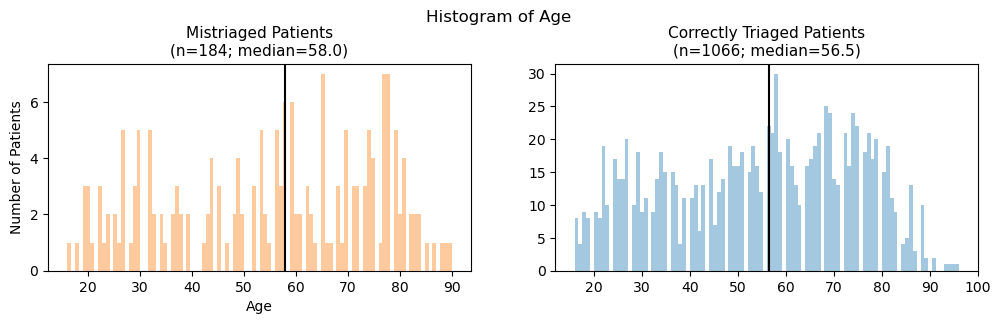

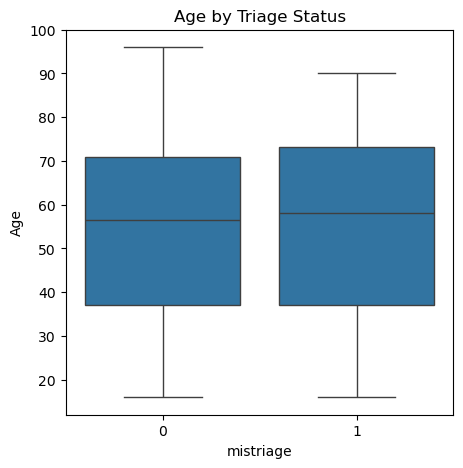




********************************************************************************
Patients number per hour
********************************************************************************


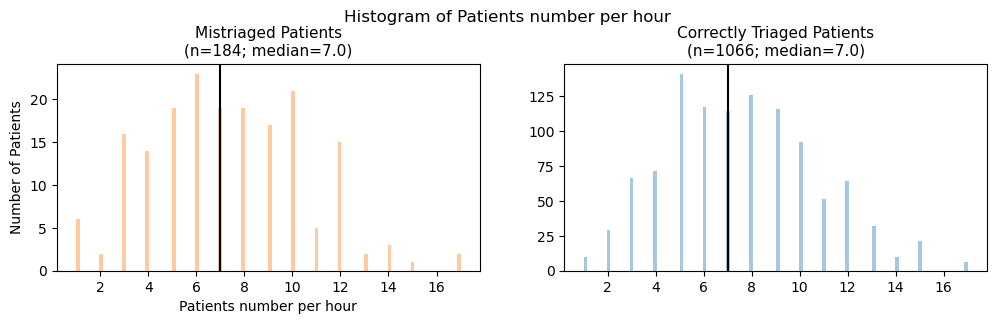

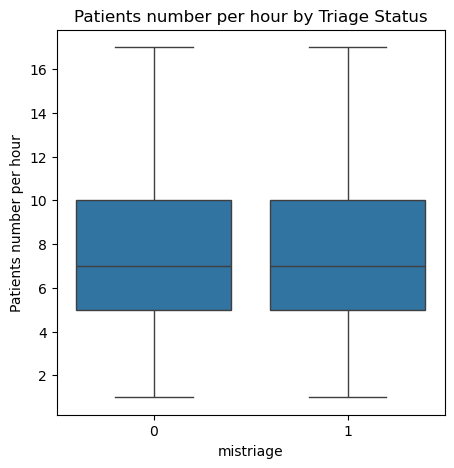




********************************************************************************
SBP
********************************************************************************


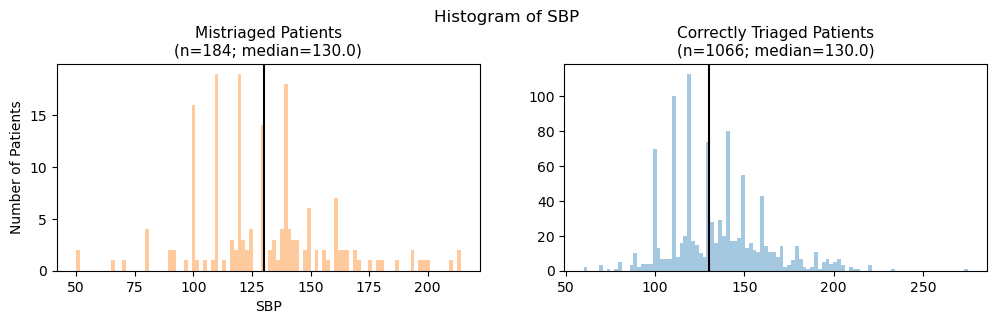

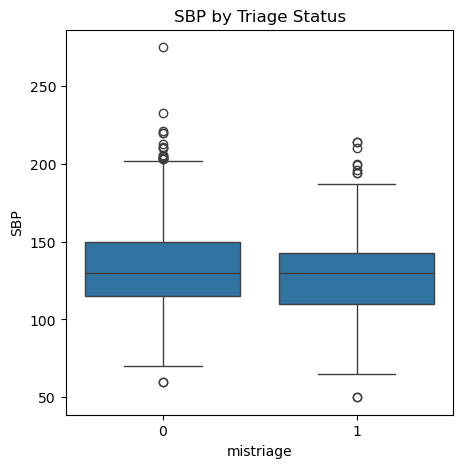




********************************************************************************
DBP
********************************************************************************


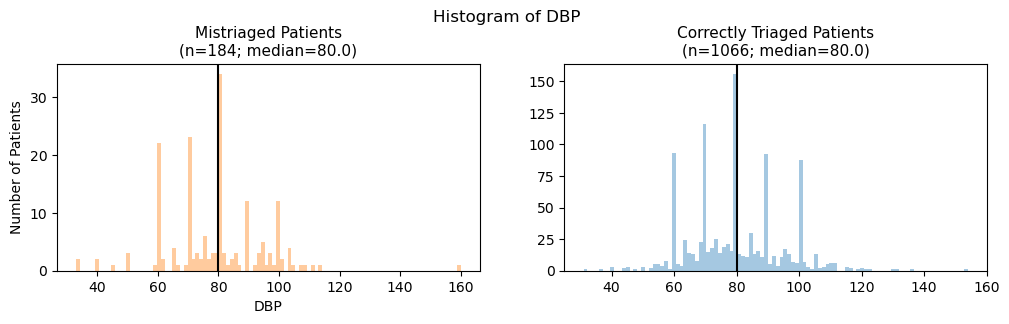

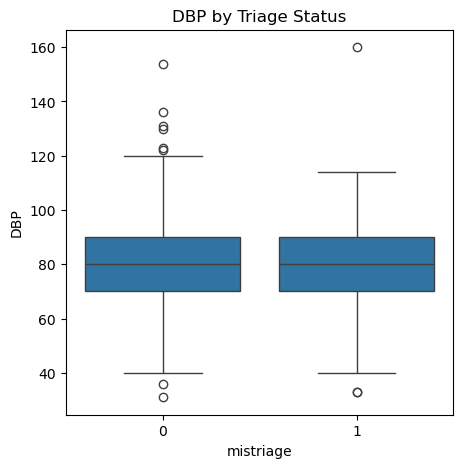




********************************************************************************
HR
********************************************************************************


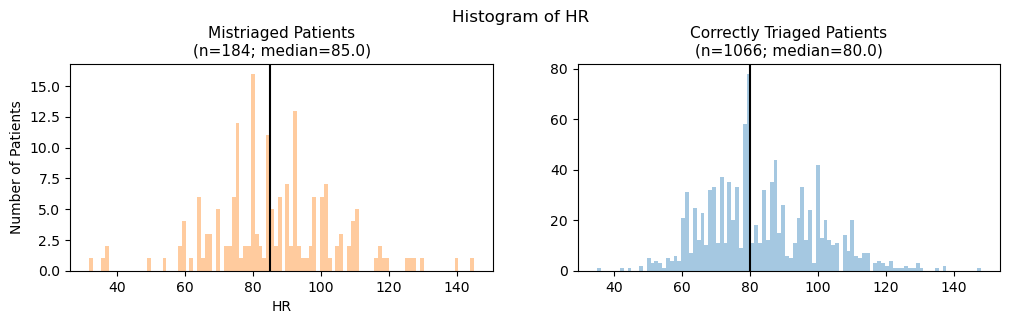

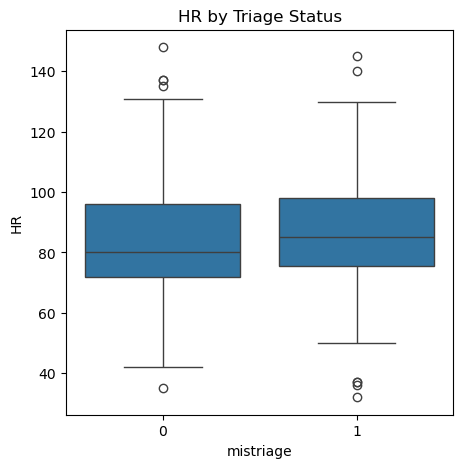




********************************************************************************
RR
********************************************************************************


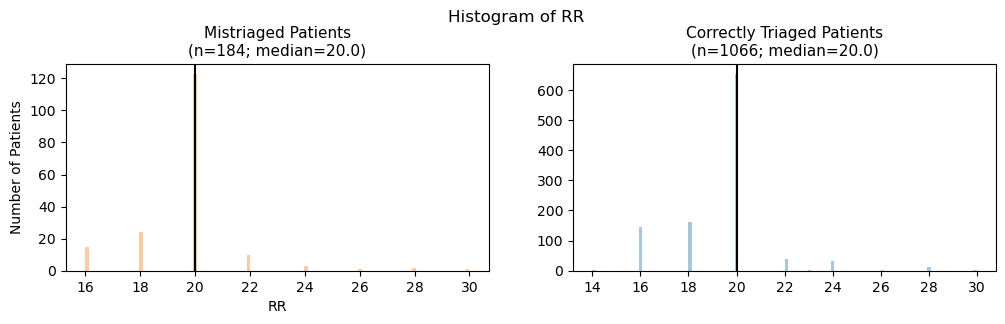

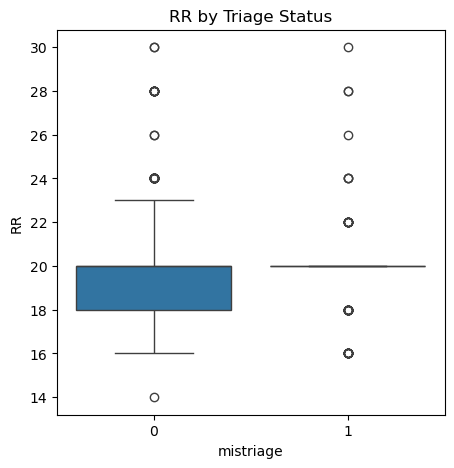




********************************************************************************
BT
********************************************************************************


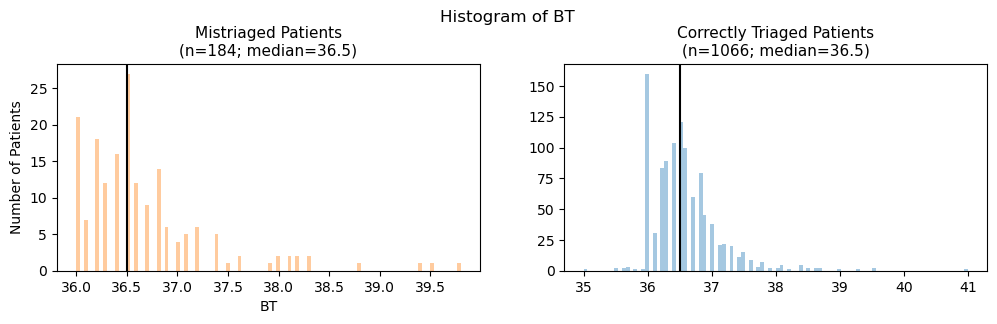

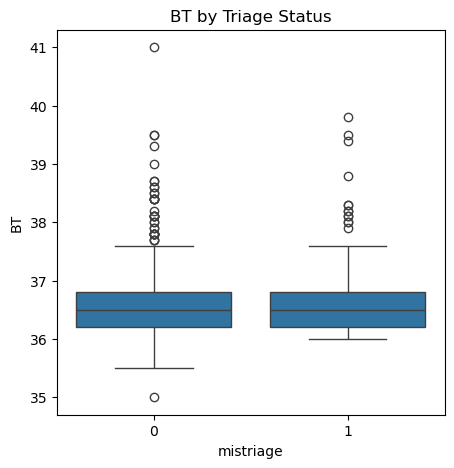




********************************************************************************
Saturation
********************************************************************************


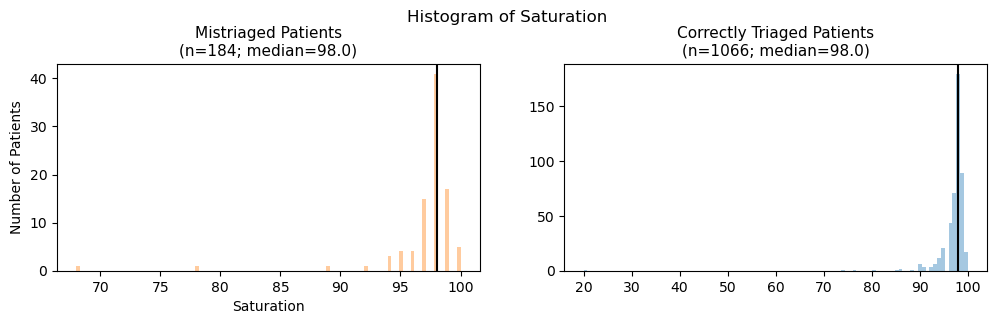

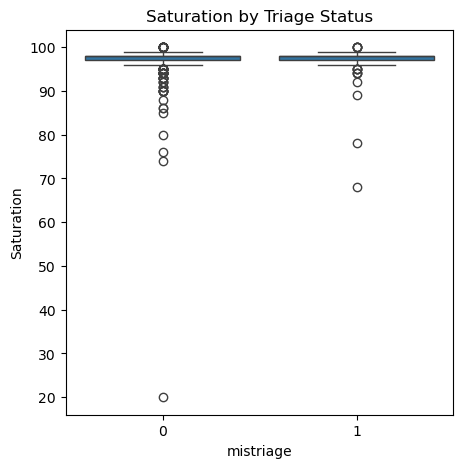




********************************************************************************
Length of stay_min
********************************************************************************


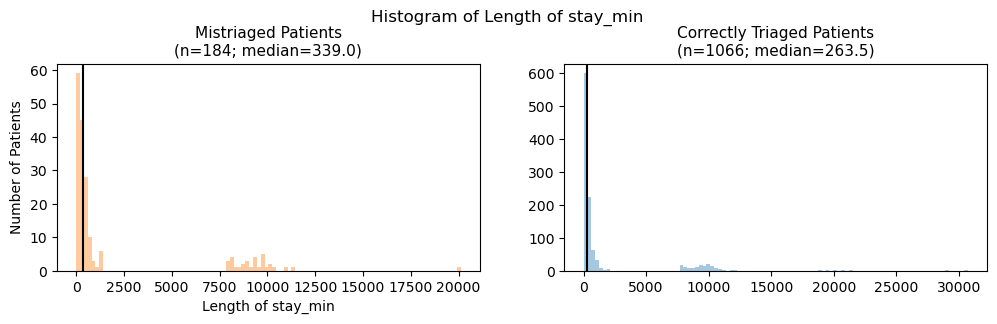

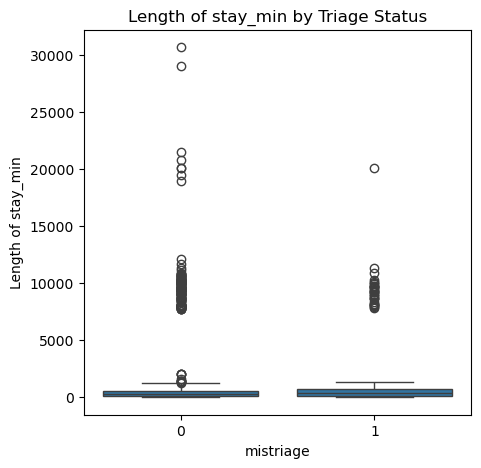




********************************************************************************
KTAS duration_min
********************************************************************************


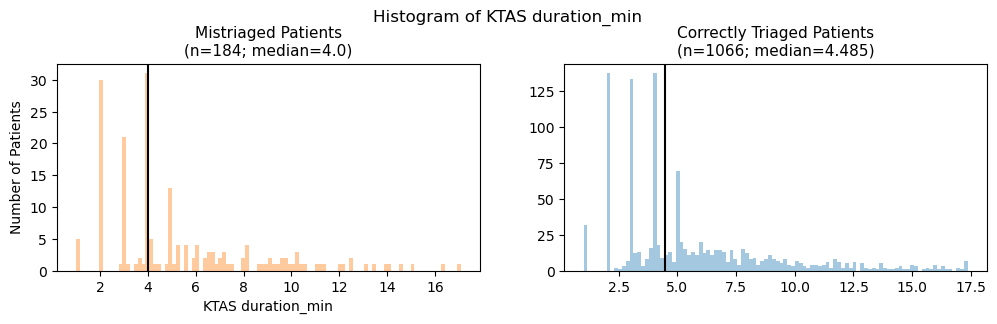

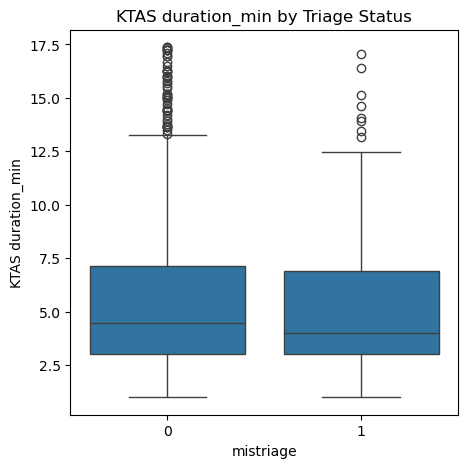

In [56]:
for cont in continuous:
    print("\n\n\n" + "*" * 80)
    print(cont)
    print("*" * 80)
    
    # Plot histogram of continuous value distributions in mistriaged and correctly triaged patients
    fig,(ax1, ax2) = plt.subplots(1, 2, figsize = [12,3])
    fig.suptitle('Histogram of ' + cont)
    fig.subplots_adjust(top=0.8)
    ax1.hist(df[df["mistriage"] == True][cont], bins = 100, alpha = 0.4, color = "#ff7f0e")
    ax1.set_title('Mistriaged Patients\n(n=' + str(df[df["mistriage"] == True].shape[0]) + "; median=" + 
                  str(round(df[df["mistriage"] == True][cont].median(), 3)) + ")", fontsize = 11)
    ax1.axvline(df[df["mistriage"] == True][cont].median(), color = "black")
    ax1.set_ylabel("Number of Patients")
    ax1.set_xlabel(cont)
    ax2.hist(df[df["mistriage"] == False][cont], bins = 100, alpha = 0.4, color = "#1f77b4")
    ax2.set_title('Correctly Triaged Patients\n(n=' + str(df[df["mistriage"] == False].shape[0]) + "; median=" + 
                  str(round(df[df["mistriage"] == False][cont].median(), 3)) + ")", fontsize = 11)
    ax2.axvline(df[df["mistriage"] == False][cont].median(), color = "black")
    ax1.set_ylabel("Number of Patients")
    ax1.set_xlabel(cont)
    plt.show()
    
    # Visualize distribution differences (if any) between mistriaged and correctly triaged patients using a boxplot
    plt.figure(figsize=(5,5))
    sns.boxplot(data=df, x="mistriage", y=cont)
    plt.title(cont + " by Triage Status")
    plt.show()

Based on the relationship with the target variable (mistriage), the following features will be selected for modelling:


| Feature Name    | Type    | Predictor Strength | Key Observation from Data |
|---------------|-------|--------------------|---------------------------|
| KTAS_RN | Categorical/Ordinal | Strong | The proportion of mistriage increases significantly with the triage level, ranging from 42.3% at KTAS Level 1 to between 8.6% to 18.0% at all other KTAS Levels. This is a critical variable. |
| HR | Continuous | Strong | The mean pulse rate is noticeably higher for mistriaged patients (85.0) compared to correctly triaged patients (80.0). |
| Injury | Categorical (1 vs. 2) | Strong | Patients presenting with an Injury (1) had a higher proportion of mistriage (15.7%) compared to non-injury patients (10.7%). |
| Diagnosis in ED | Categorical/Nominal | Strong | The proportion of mistriage varies widely across the top 10 diagnoses, from as low as 4.8% (Ischaemic chest pain) to over 26% (Unspecified abdominal pain). This variance indicates high predictive power, but requires careful encoding. |
| Age | Continuous | Weak | The difference in mean age is minor (58.0 for mistriaged vs 56.5 for correctly triaged), but still present. |
| Other Physiological Variables    | Continuous | Weak | Variables like SBP, DBP, RR, and BT have very similar mean values - or identical - for both groups (e.g., RR is 20.0 vs 20.0). They may be redundant or add noise, this will be determined during classification steps. |
| Time Variables | Continuous | Weak | KTAS duration_min and Length of stay_min show very small differences in means. They may be redundant or add noise, this will be determined during classification steps. |